IA & Data science (LU3IN0226) -- 2021-2022
--------
*&copy; Equipe pédagogique: Vincent Guigue, Christophe Marsala, Olivier Schwander.*

<font size="+1" color="RED"><b>[Q]</b></font> <font size="+1"><b>Indiquer dans la boîte ci-dessous vos noms et prénoms :</b></font>

- Amine YOUCEF KHODJA
- Malik DOUFENE

<b>Ce projet peut être fait en binôme (et c'est fortement conseillé) ou tout seul.</b>
Le nom de chaque membre du binôme doit être indiqué, et un seul rendu sur un des deux comptes Moodle doit être fait.

<b>Les groupes de plus de 2 personnes ne sont pas autorisés.</b>

<font color="RED" size="+1"><b>[Q]</b></font> **Renommer ce fichier ipython**

Tout en haut de cette page, cliquer sur <tt>projet-2</tt> et rajouter à la suite de <tt>projet-2</tt> les noms des membres du binômes séparés par un tiret.

<font color="RED" size="+1">IMPORTANT: soumission de votre fichier final</font>

**Nom à donner au notebook** : *projet-2-Nom1_Nom2.ipynb* 
- *Nom1* et *Nom2* : noms des membres du binôme

**Le compte-rendu doit être rendu sur la page Moodle.**

# Projet 2 - avril-mai 2022


<font size="+1" color="RED"><b>Date de rendu : lundi 9 mai, 19h au plus tard</b></font>
    
(<b>attention! le site Moodle ferme à 19h pile !</b> prévoyez de vous y connecter au moins 15mn avant la fermeture...)


Vous devez compléter ce notebook en rajoutant vos expérimentations avec vos algorithmes d'apprentissage sur les données Agribalise qui sont des données ouvertes dont la documentation peut être consultée ici : https://doc.agribalyse.fr/documentation/acces-donnees

Très important : les fichiers de données doivent être placés de façon à respecter la structure de fichiers suivante :

          --iads/
              -- Classifiers.py
              -- etc.
          -- projet/
              -- ce_notebook.ipynb
              -- Donnees_Agribalyse/
                  -- detail_ingredient.csv
                  -- detail_etape.csv
                  -- synthese.csv

Dans le notebook, le chargement des fichiers de données considèrera donc cette arborescence.

## Travail à faire

Appliquer les algorithmes d'apprentissage vus tout au long du semestre sur les données afin de mettre en évidence des résultats intéressants.
Deux problèmes, au moins, doivent être traités:
- un problème d'apprentissage supervisé
- un problème d'apprentissage non supervisé


## Travail à rendre
Ce qui doit être remis avant la date limite : un fichier archive (`.tar`, `.tgz`, ou `.zip` uniquement) contenant:
- ce notebook complété. Il doit pouvoir être exécuté sans autre apport (pensez à vous en assurer avant de le rendre). 
- votre librairie iads sous la forme d'une archive du répertoire iads/
- un fichier PDF dont le nom est de la forme: *projet-1-Nom1_Nom2.pdf* qui correspond à un poster décrivant l'ensemble des expérimentations menées et les résultats obtenus.


<b>IMPORTANT</b>: Les fichiers de données ne doivent pas être inclus dans votre archive !

## Soutenance des projets
La soutenance sera organisée après la semaine d'examens de mai entre le 17 et le 25 mai (la date sera précisé sur le forum du Moodle).

La <b>soutenance est obligatoire</b> : tout projet pour lequel une soutenance n'a pas eu lieu sera noté $0$.

Modalités de la soutenance:
- durée de la soutenance : 10 mn pour un binôme, 7 mn pour un monôme ;
- elle a lieu devant un ordinateur avec le notebook et le poster comme support ;
    - elle commence par une rapide présentation des expérimentations réalisées et résultats obtenus (max. 4 à 5mns)
    - puis elle se poursuit par des questions posées individuellement aux membres du binômes sur les expériences ou le code python réalisé.
- la note de soutenance est individuelle pour chaque membre d'un binôme.




# Repartition

Le travail est decomposé en deux notebooks , un pour la demarche supervisé et l'autre pour la non-supervisée.

# Problematiques Non Supervisées

## Exemples

In [2]:
# Importation des librairies standards:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import random as rd
%matplotlib inline  

# Importation de votre librairie iads:
# La ligne suivante permet de préciser le chemin d'accès à la librairie iads
import sys
sys.path.append('../')   # iads doit être dans le répertoire frère du répertoire courant !

# Importation de la librairie iads
import iads as iads

# importation de Classifiers
from iads import Classifiers as cl

# importation de utils
from iads import utils as ut

# importation de Clustering
from iads import clustering as clust

import warnings
warnings.filterwarnings('ignore')

# commande TRES utile pour recharger automatiquement le code que vous modifiez dans les modules
%load_ext autoreload
%autoreload 2

## Importation des Données

In [3]:
data_synthese = pd.read_csv("Donnees_Agribalyse/synthese.csv")
data_synthese.columns
print("Nombre de lignes: ",len(data_synthese))

Nombre de lignes:  2479


In [3]:
data_synthese.loc[0:5]

,Code AGB,Code CIQUAL,Groupe d'aliment,Sous-groupe d'aliment,Nom du Produit en Français,LCI Name,Saisonnalité,Transport par avion (1 : par avion),Livraison,Matériau d'emballage,...,Particules (E-06 disease inc./kg de produit),Acidification terrestre et eaux douces (mol H+ eq/kg de produit),Eutrophisation terreste (mol N eq/kg de produit),Eutrophisation eaux douces (E-03 kg P eq/kg de produit),Eutrophisation marine (E-03 kg N eq/kg de produit),Utilisation du sol (Pt/kg de produit),Écotoxicité pour écosystèmes aquatiques d'eau douce (CTUe/kg de produit),Épuisement des ressources eau (m3 depriv./kg de produit),Épuisement des ressources énergétiques (MJ/kg de produit),Épuisement des ressources minéraux (E-06 kg Sb eq/kg de produit)
0,13712,13712,"fruits, légumes, légumineuses et oléagineux",fruits,"Abricot au sirop léger, appertisé, égoutté","Apricot, canned in light syrup, drained",mix de consommation FR,0,Ambiant (moyenne),Acier,...,0.096413,0.009301,0.031766,0.410555,1.502775,44.823181,62.195218,1.630637,47.237697,2.938064
1,13713,13713,"fruits, légumes, légumineuses et oléagineux",fruits,"Abricot au sirop léger, appertisé, non égoutté","Apricot, canned in light syrup, not drained",mix de consommation FR,0,Ambiant (moyenne),Acier,...,0.059314,0.005726,0.019499,0.235366,0.797791,27.901738,36.285914,1.010960,29.397697,1.823726
2,13714,13714,"fruits, légumes, légumineuses et oléagineux",fruits,"Abricot au sirop, appertisé, égoutté","Apricot, in syrup, canned, drained",mix de consommation FR,0,Ambiant (moyenne),Acier,...,0.096413,0.009301,0.031766,0.410555,1.502775,44.823181,62.195218,1.630637,47.237697,2.938064
3,13715,13715,"fruits, légumes, légumineuses et oléagineux",fruits,"Abricot au sirop, appertisé, non égoutté","Apricot, in syrup, canned, not drained",mix de consommation FR,0,Ambiant (moyenne),Acier,...,0.059314,0.005726,0.019499,0.235366,0.797791,27.901738,36.285914,1.010960,29.397697,1.823726
4,13000,13000,"fruits, légumes, légumineuses et oléagineux",fruits,"Abricot, dénoyauté, cru","Apricot, pitted, raw",mix de consommation FR,0,Ambiant (moyenne),LPDE,...,0.061462,0.007254,0.025954,0.204244,0.943669,43.838644,41.957928,1.412878,17.123820,2.173328
5,13001,13001,"fruits, légumes, légumineuses et oléagineux",fruits,"Abricot, dénoyauté, sec","Apricot, pitted, dried",mix de consommation FR,0,Ambiant (moyenne),LPDE,...,0.315730,0.041668,0.156978,1.036479,4.955795,248.627750,260.488540,7.717328,184.622520,11.016019


In [4]:
data_ingredient = pd.read_csv("Donnees_Agribalyse/detail_ingredient.csv")
data_ingredient.columns
print("Nombre de lignes: ",len(data_ingredient))

Nombre de lignes:  5671


In [5]:
data_ingredient.loc[0:5]

,Ciqual AGB,Ciqual code,Nom Français,Groupe d'aliment,Sous-groupe d'aliment,LCI Name,Ingredients,Score unique EF (mPt/kg de produit),Changement climatique (kg CO2 eq/kg de produit),Appauvrissement de la couche d'ozone (E-06 kg CVC11 eq/kg de produit),...,Particules (E-06 disease inc./kg de produit),Acidification terrestre et eaux douces (mol H+ eq/kg de produit),Eutrophisation terreste (mol N eq/kg de produit),Eutrophisation eaux douces (E-03 kg P eq/kg de produit),Eutrophisation marine (E-03 kg N eq/kg de produit),Utilisation du sol (Pt/kg de produit),Écotoxicité pour écosystèmes aquatiques d'eau douce (CTUe/kg de produit),Épuisement des ressources eau (m3 depriv./kg de produit),Épuisement des ressources énergétiques (MJ/kg de produit),Épuisement des ressources minéraux (E-06 kg Sb eq/kg de produit)
0,11168,11168,"Sauce aïoli, préemballée",aides culinaires et ingrédients divers,sauces,"Aioli sauce (garlic and olive oil mayonnaise),...",Jaune d'œuf,0.039743,0.164754,0.014089,...,0.046616,0.006761,0.029441,0.052027,1.329230,16.984964,7.404112,0.337769,1.475548,0.251356
1,11168,11168,"Sauce aïoli, préemballée",aides culinaires et ingrédients divers,sauces,"Aioli sauce (garlic and olive oil mayonnaise),...",Ail,0.004417,0.011444,0.002512,...,0.000781,0.000105,0.000328,0.004760,0.189983,1.643787,1.216336,0.291209,0.229937,0.084028
2,11168,11168,"Sauce aïoli, préemballée",aides culinaires et ingrédients divers,sauces,"Aioli sauce (garlic and olive oil mayonnaise),...",Jus de citron,0.019375,0.061230,0.007842,...,0.006365,0.000951,0.003573,0.016918,0.213721,3.707242,2.625043,1.445978,0.793865,0.203959
3,11168,11168,"Sauce aïoli, préemballée",aides culinaires et ingrédients divers,sauces,"Aioli sauce (garlic and olive oil mayonnaise),...",Huile d'olive,0.445364,1.161825,0.136467,...,0.142041,0.021524,0.088459,0.554361,9.263219,7.579606,464.100950,9.374618,12.100965,4.424012
4,11168,11168,"Sauce aïoli, préemballée",aides culinaires et ingrédients divers,sauces,"Aioli sauce (garlic and olive oil mayonnaise),...",Autres étapes,0.080761,0.571172,0.126768,...,0.024611,0.002630,0.008368,0.090374,1.295442,4.529954,11.433712,0.759522,22.626111,1.278583
5,24664,24664,Gâteau aux amandes type financier,produits céréaliers,gâteaux et pâtisseries,Almond cake,Amande,0.349367,0.914647,0.070591,...,0.098041,0.012824,0.046970,0.406947,4.767077,64.110420,49.548089,27.024469,11.359491,8.104749


In [6]:
data_etape = pd.read_csv("Donnees_Agribalyse/detail_etape.csv")
data_etape.columns
print("Nombre de lignes: ",len(data_etape))

Nombre de lignes:  2480


In [7]:
data_etape.loc[0:5]

,Code AGB,Code CIQUAL,Groupe d'aliment,Sous-groupe d'aliment,Nom du Produit en Français,LCI Name,DQR,Nom et code,Score unique EF (mPt / kg de produit) - Agriculture,Score unique EF (mPt / kg de produit) - Transformation,...,Épuisement des ressources minéraux (E-06 kg Sb eq/kg de produit) - Agriculture,Épuisement des ressources minéraux (E-06 kg Sb eq/kg de produit) - Transformation,Épuisement des ressources minéraux (E-06 kg Sb eq/kg de produit) - Emballage,Épuisement des ressources minéraux (E-06 kg Sb eq/kg de produit) - Transport,Épuisement des ressources minéraux (E-06 kg Sb eq/kg de produit) - Supermarché et distribution,Épuisement des ressources minéraux (E-06 kg Sb eq/kg de produit) - Consommation,DQR - P,DQR - TiR,DQR - GR,DQR - TeR
0,12112,12112,lait et produits laitiers,fromages,Abondance,"Abondance cheese, from cow's milk",2.24,Abondance (12112),0.470679,0.046274,...,2.855985,0.552672,0.108718,0.985193,0.148203,0.042714,2.84,2.05,1.18,2.87
1,13712,13712,"fruits, légumes, légumineuses et oléagineux",fruits,"Abricot au sirop léger, appertisé, égoutté","Apricot, canned in light syrup, drained",2.46,"Abricot au sirop léger, appertisé, égoutté (13...",0.061297,0.075215,...,1.281828,0.477989,0.220289,0.679414,0.263117,0.015426,2.25,3.62,1.96,2.01
2,13713,13713,"fruits, légumes, légumineuses et oléagineux",fruits,"Abricot au sirop léger, appertisé, non égoutté","Apricot, canned in light syrup, not drained",2.46,"Abricot au sirop léger, appertisé, non égoutté...",0.038249,0.046934,...,0.799861,0.298265,0.137461,0.423954,0.164185,0.000000,2.25,3.62,1.96,2.01
3,13714,13714,"fruits, légumes, légumineuses et oléagineux",fruits,"Abricot au sirop, appertisé, égoutté","Apricot, in syrup, canned, drained",2.46,"Abricot au sirop, appertisé, égoutté (13714)",0.061297,0.075215,...,1.281828,0.477989,0.220289,0.679414,0.263117,0.015426,2.25,3.62,1.96,2.01
4,13715,13715,"fruits, légumes, légumineuses et oléagineux",fruits,"Abricot au sirop, appertisé, non égoutté","Apricot, in syrup, canned, not drained",2.44,"Abricot au sirop, appertisé, non égoutté (13715)",0.038249,0.046934,...,0.799861,0.298265,0.137461,0.423954,0.164185,0.000000,2.21,3.65,1.92,1.97
5,13000,13000,"fruits, légumes, légumineuses et oléagineux",fruits,"Abricot, dénoyauté, cru","Apricot, pitted, raw",2.20,"Abricot, dénoyauté, cru (13000)",0.061101,0.000000,...,1.277733,0.000000,0.150130,0.533833,0.205231,0.006400,1.96,3.54,1.66,1.66


### Premieres Idées

- Prediction du groupe d'aliment 
- Clusteing en sous-groupe au sein d'un groupe d'aliment
- Clustering en groupe d'aliment tous le jeu de données
- Prediction si l'aliment est transporté par avion ou pas
- Prediction du DQR (note de qualité) d'un certain aliment
- Predicition du 'Score unique EF (mPt/kg de produit)' pour chaque element
- Prediction du nombre d'ingredients d'un aliment ( necessite de reformuler le dataset )  

# Jeu de Données de Synthese

### Fonctions rajoutées hors IADS

In [8]:
#--------------------------------------------------------------
# Renvoie la classe minoritaire de Y avec la difference valeurs avec la classe majoritaire
def classes_minoritaires(Y):
    uniques = np.unique(Y,return_counts=True)
    result = []
    maxi = np.max(uniques[1])
    for i in range(len(uniques[0])):
        if(uniques[1][i] != maxi):
            result.append((uniques[0][i],maxi-uniques[1][i]))
    return result
#-----------------------------------------------------------------------------------------------
#-----------------------------------------------------------------------------------------------
def idx_min(X,Y,classe):
    res = []
    for i in range(len(Y)):
        if(Y[i] == classe):
            res.append(X[i])
        
    return res
#-----------------------------------------------------------------------------------------------

#--------------------------------------------------------------
# Re-echantillonage de classes minoritaires
# Permet de recompleter la classe avec des lignes choisies d'une maniere random 
def random_sampling(X,Y,verbose=False):
    cls = classes_minoritaires(Y)
    for classe in cls:
        exemples_min = idx_min(X,Y,classe[0]) 
        X = list(X)
        Y = list(Y)
        if(verbose):
            print("Rajouter",classe[1]," pour la classe",classe[0])
        for i in range(classe[1]):
            elem = rd.choice(np.arange(len(exemples_min)))
            X.append(exemples_min[elem])
            Y.append(classe[0])
        
    return (np.array(X),np.array(Y))
#---------------------------------------------------------------------
def extraire_col(data,num_col):
    return data[data.columns[num_col]]
#---------------------------------------------------------------------------
def pourc(tab):
    res = []
    for elem in tab:
        res.append((elem*100)/sum(tab))
    return res
#--------------------------------------------------------------------------
# Pour trouver les valeurs aberrantes d'un colonne
def trouver_outliers(data,var_name): 
    iqr = data[var_name].quantile(0.75) -  data[var_name].quantile(0.25) 
    born_inf = data[var_name].quantile(0.25)
    born_sup = data[var_name].quantile(0.75)
    return data[(data[var_name]<born_inf) | (data[var_name]>born_sup)],born_inf,born_sup
#-----------------------------------------------------------------------------------------
# Renvoie les colonnes dont la correlation est inferieur au seuil
def correlation(data,seuil):
    col_corr = set()
    corr_matrix = data.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i,j])<seuil : 
                colname=corr_matrix.columns[i]
                col_corr.add(colname)
    return col_corr
#------------------------------------------------------------------------------------------------
# Renvoie une evaluation sur le plan semantique d'une certaine affectation trouvée par K-moyennes
def evaluationSemantique(Y,l_affectation,verbose=False):
    affectClusters = []
    for affect in l_affectation:
        affectClusters.append([Y[elem] for elem in l_affectation[affect]])
    
    if(verbose):
        for cluster in affectClusters:
            print("Cluster ",affectClusters.index(cluster),": ")
            print("----------------------------------------")
            uni = np.unique(cluster,return_counts=True)
            for i in range(len(uni[0])):
                print(uni[1][i]," ",uni[0][i])
            print("----------------------------------------\n")
#------------------------------------------------------------------------------------------------
             
def renvoyer(dataframe,n,name):
    return dataframe[extraire_col(dataframe,n)==name]

#------------------------------------------------------------------------------------------------

def encode(Y):
    res = []
    a,v = np.unique(Y,return_counts=True)
    for elem in Y:
        res.append(list(a).index(elem)) 
        
    return np.array(res)
    
#-----------------------------------------------------------------------------------------------

Dans ce Notebook nous allons etudier des problematiques non surpervisé.
- Nous allons dans un premier temps clusterer en Sous-groupe d'aliments au sein d'un meme groupe ( on prendera deux groupes par exemple )
- Dans un second lieu , nous etudierons la possibilité de clusterer tous les elements en leurs groupes d'elements .

Fonction qui nettoye les données 

In [187]:
def dataPreparation(dataframe):
    # Sauvgrader les codes des aliments pour pourvoir interpreter la suite les resultats
    data_synthese_infos = dataframe[["Code AGB","Nom du Produit en Français"]]
    
    # supprimer les colonnes jugées inutiles
    data_synthese_bis = dataframe.drop(columns=["Code AGB","Groupe d'aliment","Code CIQUAL","Transport par avion (1 : par avion)","Saisonnalité","Nom du Produit en Français","LCI Name"])
   
    # remplacer les erreurs de frappe de la variable "Preparation"
    data_synthese_bis.loc[data_synthese_bis["Préparation"]=="Four ","Préparation"] = "Four"
    data_synthese_bis.loc[data_synthese_bis["Préparation"]=="Micro onde ","Préparation"] = "Micro onde"
    data_synthese_bis.loc[data_synthese_bis["Préparation"]=="Pas de préparation ","Préparation"] = "Pas de préparation"
   
    # Codifier la variable cible de la problematique
#     a,v = np.unique(extraire_col(data_synthese_bis,0),return_counts=True)
#     for elem in a:
#         data_synthese_bis.loc[data_synthese_bis["Groupe d'aliment"]==elem,"Groupe d'aliment"] = list(a).index(elem)
    
    # Identifier les outliers et les remplacer par la valeur medianne de la variable associée
    here = data_synthese_bis.describe()
    colonnes = [col for col in here.columns if col != "Transport par avion (1 : par avion)"]
    for col in colonnes:
        outliers = trouver_outliers(data_synthese_bis,col)[0]
        Q1 =  trouver_outliers(data_synthese_bis,col)[1]
        Q3 =  trouver_outliers(data_synthese_bis,col)[2]
        data_synthese_bis.loc[(outliers.index ,col)] = (Q3+Q1)/2
    
    # Avoir toutes les variable sur tout si certaines sont fortement corrélées entre elles peut biaiser les resultats
    # du modele.c'est pour ca que nous supprimons les variables qui sont fortement corrélées ( > seuil== 0.8 par exemple)
    corr_col = correlation(data_synthese_bis,0.2)
    data_synthese_bis.drop(corr_col,axis=1,inplace=True)
    
    # retourne le dataset préparé et les infos du dataset
    return data_synthese_bis,data_synthese_infos
    

In [6]:
def dataPreparationbis(dataframe):
    # Sauvgrader les codes des aliments pour pourvoir interpreter la suite les resultats
    data_synthese_infos = dataframe[["Code AGB","Nom du Produit en Français"]]
    
    # supprimer les colonnes jugées inutiles
    data_synthese_bis = dataframe.drop(columns=["Code AGB","Code CIQUAL","Transport par avion (1 : par avion)","Saisonnalité","Nom du Produit en Français","LCI Name"])
   
    # remplacer les erreurs de frappe de la variable "Preparation"
    data_synthese_bis.loc[data_synthese_bis["Préparation"]=="Four ","Préparation"] = "Four"
    data_synthese_bis.loc[data_synthese_bis["Préparation"]=="Micro onde ","Préparation"] = "Micro onde"
    data_synthese_bis.loc[data_synthese_bis["Préparation"]=="Pas de préparation ","Préparation"] = "Pas de préparation"
   
    # Codifier la variable cible de la problematique
#     a,v = np.unique(extraire_col(data_synthese_bis,0),return_counts=True)
#     for elem in a:
#         data_synthese_bis.loc[data_synthese_bis["Groupe d'aliment"]==elem,"Groupe d'aliment"] = list(a).index(elem)
    
    # Identifier les outliers et les remplacer par la valeur medianne de la variable associée
    here = data_synthese_bis.describe()
    colonnes = [col for col in here.columns if col != "Transport par avion (1 : par avion)"]
    for col in colonnes:
        outliers = trouver_outliers(data_synthese_bis,col)[0]
        Q1 =  trouver_outliers(data_synthese_bis,col)[1]
        Q3 =  trouver_outliers(data_synthese_bis,col)[2]
        data_synthese_bis.loc[(outliers.index ,col)] = (Q3+Q1)/2
    
    # Avoir toutes les variable sur tout si certaines sont fortement corrélées entre elles peut biaiser les resultats
    # du modele.c'est pour ca que nous supprimons les variables qui sont fortement corrélées ( > seuil== 0.8 par exemple)
    corr_col = correlation(data_synthese_bis,0.2)
    data_synthese_bis.drop(corr_col,axis=1,inplace=True)
    
    # retourne le dataset préparé et les infos du dataset
    return data_synthese_bis,data_synthese_infos
    

# Clustering en sous-groupe d'aliment au sein d'un groupe

Pour clusterer les sous-groupes en sein d'un certain groupe en utilisant l'algorithme des K-moyennes , nous allons essayer deux approches differentes pour trouver un K qui maximise le gain des clusters en terme d'inertie inter-clusters et intra-clusters .

#### Premiere Technique 

- l'idée est que pour chaque K nous allons essayer de chercher la partition qui minimise l'indice et dunn et de Xeni-Beni .
Parmi les K partitions choisies , nous calculons l'intertie globale de cette partition .
Et on prendra le K qui minise l'inertie globale.

In [189]:
def clustTech1(max_iter,data_synthese_bis):
    abssic = [i for i in range(2,max_iter)]
    inner = []
    affecs = []
    # boucle pour essayer plusieurs K 
    for K in abssic:
        ordo = []
        ordo1 = []
        partitions = []
        # boucle pour essayer de determiner le resultat qui serra bcp plus random 
        for i in abssic:
            les_centres, l_affectation = clust.kmoyennes(K, data_synthese_bis, 0.05,100)
            ordo.append(clust.index_dunn(data_synthese_bis,l_affectation))
            ordo1.append(clust.index_XieBeni(data_synthese_bis,les_centres,l_affectation))
            partitions.append(l_affectation)
        # chercher la valeur minimal de (dunn + beni)
        minimum = np.argmin([ordo[i]+ordo1[i] for i in range(len(ordo))])
        # retrouver la partition qui a minimiser ces indices d'evaluations
        part_min = partitions[minimum]
        affecs.append(part_min)
        inner.append(clust.inertie_globale(data_synthese_bis,part_min))

    plt.plot(abssic,inner)
    plt.title("Les Innerties selon K") 
    plt.show()
    return np.argmin(inner)+2

#### Deuxieme Technique

- Pour chaque K nous calculons 20 partitions differentes et nous sauvgrardons l'indice de dunn et l'indice de Xeni-Beni moyens. A la fin , nous prenderons le K qui minimiser cette moyenne.( K bien evidemment doit etre different de 1 )  

In [190]:
def clustTech2(max_iter,data_synthese_bis):
    abssic = [i for i in range(2,max_iter)]
    dunns = []
    benis = []
    # boucle pour essayer plusieurs K 
    for K in abssic:
        ordo = []
        ordo1 = []
        # boucle pour essayer de determiner le resultat qui serra bcp plus random 
        for i in abssic:
            les_centres, l_affectation = clust.kmoyennes(K, data_synthese_bis, 0.05,100)
            ordo.append(clust.index_dunn(data_synthese_bis,l_affectation))
            ordo1.append(clust.index_XieBeni(data_synthese_bis,les_centres,l_affectation))
        dunns.append(np.mean(ordo))
        benis.append(np.mean(ordo1))
    
    plt.plot(abssic,dunns)
    plt.plot(abssic,benis)
    plt.title("Indices de Dunn et Xeni-Beni Selon K")
    plt.show()
    moys = (np.array(dunns)+np.array(benis))/2
    return np.argmin(list(moys))+2

Cette fonction generique permet de definir des clustering ( selon les deux techniques ) en fonction d'une base d'apprentissage et un nom de groupe figurant dans la colonne "Groupe d'aliments".
Les grandes lignes de cette fonction : 
- recuperer les lignes correspondantes au nom du groupe 
- Afficher les repartitions de ses sous-groupes
- Afficher la matrice de correlation des données du groupe en HeatMap
- Afficher une visualisation des données sur 2D (avec PCA ) 
- Appliquer la technique 01
    - Retourver le K correspondant
    - Appliquer l'algo des K-moyennes sur ce K
    - Afficher les indices de Dunn et Xenu-Beni relatifs a l'affectation de l'algorithme
    - Interpreter le clustering generé grace a la fonction 'EvaluationSemantique'
- Appliquer la technique 02
    - Retourver le K correspondant
    - Appliquer l'algo des K-moyennes sur ce K
    - Afficher les indices de Dunn et Xenu-Beni relatifs a l'affectation de l'algorithme
    - Interpreter le clustering generé grace a la fonction 'EvaluationSemantique'

In [4]:
data_synthese.head(6)

,Code AGB,Code CIQUAL,Groupe d'aliment,Sous-groupe d'aliment,Nom du Produit en Français,LCI Name,Saisonnalité,Transport par avion (1 : par avion),Livraison,Matériau d'emballage,...,Particules (E-06 disease inc./kg de produit),Acidification terrestre et eaux douces (mol H+ eq/kg de produit),Eutrophisation terreste (mol N eq/kg de produit),Eutrophisation eaux douces (E-03 kg P eq/kg de produit),Eutrophisation marine (E-03 kg N eq/kg de produit),Utilisation du sol (Pt/kg de produit),Écotoxicité pour écosystèmes aquatiques d'eau douce (CTUe/kg de produit),Épuisement des ressources eau (m3 depriv./kg de produit),Épuisement des ressources énergétiques (MJ/kg de produit),Épuisement des ressources minéraux (E-06 kg Sb eq/kg de produit)
0,13712,13712,"fruits, légumes, légumineuses et oléagineux",fruits,"Abricot au sirop léger, appertisé, égoutté","Apricot, canned in light syrup, drained",mix de consommation FR,0,Ambiant (moyenne),Acier,...,0.096413,0.009301,0.031766,0.410555,1.502775,44.823181,62.195218,1.630637,47.237697,2.938064
1,13713,13713,"fruits, légumes, légumineuses et oléagineux",fruits,"Abricot au sirop léger, appertisé, non égoutté","Apricot, canned in light syrup, not drained",mix de consommation FR,0,Ambiant (moyenne),Acier,...,0.059314,0.005726,0.019499,0.235366,0.797791,27.901738,36.285914,1.010960,29.397697,1.823726
2,13714,13714,"fruits, légumes, légumineuses et oléagineux",fruits,"Abricot au sirop, appertisé, égoutté","Apricot, in syrup, canned, drained",mix de consommation FR,0,Ambiant (moyenne),Acier,...,0.096413,0.009301,0.031766,0.410555,1.502775,44.823181,62.195218,1.630637,47.237697,2.938064
3,13715,13715,"fruits, légumes, légumineuses et oléagineux",fruits,"Abricot au sirop, appertisé, non égoutté","Apricot, in syrup, canned, not drained",mix de consommation FR,0,Ambiant (moyenne),Acier,...,0.059314,0.005726,0.019499,0.235366,0.797791,27.901738,36.285914,1.010960,29.397697,1.823726
4,13000,13000,"fruits, légumes, légumineuses et oléagineux",fruits,"Abricot, dénoyauté, cru","Apricot, pitted, raw",mix de consommation FR,0,Ambiant (moyenne),LPDE,...,0.061462,0.007254,0.025954,0.204244,0.943669,43.838644,41.957928,1.412878,17.123820,2.173328
5,13001,13001,"fruits, légumes, légumineuses et oléagineux",fruits,"Abricot, dénoyauté, sec","Apricot, pitted, dried",mix de consommation FR,0,Ambiant (moyenne),LPDE,...,0.315730,0.041668,0.156978,1.036479,4.955795,248.627750,260.488540,7.717328,184.622520,11.016019


In [191]:
def ClusteringEnSousGroupes(dataframe,nomgroupe):
    groupes = np.unique(extraire_col(dataframe,2),return_counts=True)[0]
    if(nomgroupe not in groupes):
        print(nomgroupe," ne figure pas dans la colonne 'Groupe d'aliments' du dataframe")
        return
    
    print("----------------------------------------------------------------------------------")
    print("----------  CLUSTERING EN SOUS GROUPE ",nomgroupe,"--------------")
    print("------------------------------------------------------------------------------------")
    print("\n\n")
    
    # Recuperer les données du groupe d'aliments
    data_synthese_bis = renvoyer(dataframe,2,nomgroupe)
    
    # Afficher la repertitions des sous groupes de ce groupe
    print("La repartition des sous-groupes du groupe ",nomgroupe)
    print(np.unique(extraire_col(data_synthese_bis,3),return_counts=True))
    print("\n")
    
    # Afficher la heatmap de la matrice de la correlation
    print("Matrice de Correlation en HeatMap")
    sns.heatmap(data_synthese_bis.corr())
    plt.show()
    print("\n")
    
    # Nettoyage des données
    data_synthese_bis=dataPreparation(data_synthese_bis)[0]
    # Extraire Y qui est la colonne sous-groupe
    Y = np.array(extraire_col(data_synthese_bis,0))
    # renvoie les variables en transformant les categorielles en numeriques grace au dummies 
    X = pd.get_dummies(data_synthese_bis.drop(columns=["Sous-groupe d'aliment"]))
    X = clust.normalisation(X)
    X = np.array(X)
    
    #Visualiser le jeu de données
    print("Visualisation des sous-groupes du groupe ",nomgroupe)
    a,v = np.unique(Y,return_counts=True)
    ut.visualiser_Multi(X,encode(Y),"Visualisation Data",len(a))
    print("\n")
    
    
    # Reprendre les données de base et les nettoyer et normaliser
    data_synthese_bis = renvoyer(dataframe,2,nomgroupe)
    data_synthese_bis=dataPreparation(data_synthese_bis)[0]
    data_synthese_bis = pd.get_dummies(data_synthese_bis)
    data_synthese_bis = clust.normalisation(data_synthese_bis)
    
    
    
    max_iter = 4
    
    print("--------------------------------------------------")
    print("----------  CLUSTERING TECHNIQUE 01 --------------")
    print("--------------------------------------------------")
    
    
    
    K_opt = clustTech1(max_iter,data_synthese_bis)
    print("Le nombre de clusters proposés par la technique 01 :",K_opt)
    
    
    les_centres, l_affectation = clust.kmoyennes(K_opt, data_synthese_bis, 0.05,100)
    print("Index de Dunn pour ce Clustering est : ",clust.index_dunn(data_synthese_bis,l_affectation))
    print("Index de Xie Benu pour ce Clustering est : ",clust.index_XieBeni(data_synthese_bis,les_centres,l_affectation))
    clust.affiche_resultat(data_synthese_bis,les_centres,l_affectation)
    print("\n")
    
    
    evaluationSemantique(Y,l_affectation,True)
    print("\n")
    
    
    print("--------------------------------------------------")
    print("----------  CLUSTERING TECHNIQUE 02 --------------")
    print("--------------------------------------------------")
    
    K_opt = clustTech2(max_iter,data_synthese_bis)
    print("Le nombre de clusters proposés par la technique 01 :",K_opt)
    
    
    les_centres, l_affectation = clust.kmoyennes(K_opt, data_synthese_bis, 0.05,100)
    print("Index de Dunn pour ce Clustering est : ",clust.index_dunn(data_synthese_bis,l_affectation))
    print("Index de Xie Benu pour ce Clustering est : ",clust.index_XieBeni(data_synthese_bis,les_centres,l_affectation))
    clust.affiche_resultat(data_synthese_bis,les_centres,l_affectation)
    
    
    evaluationSemantique(Y,l_affectation,True)
    print("\n")
    

In [294]:
data_synthese.columns

Index(['Code AGB', 'Code CIQUAL', 'Groupe d'aliment', 'Sous-groupe d'aliment',
       'Nom du Produit en Français', 'LCI Name', 'Saisonnalité',
       'Transport par avion (1 : par avion)', 'Livraison',
       'Matériau d'emballage', 'Préparation',
       'DQR - Note de qualité de la donnée (1 excellente ; 5 très faible)',
       'Score unique EF (mPt/kg de produit)',
       'Changement climatique (kg CO2 eq/kg de produit)',
       'Appauvrissement de la couche d'ozone (E-06 kg CVC11 eq/kg de produit)',
       'Rayonnements ionisants (kBq U-235 eq/kg de produit)',
       'Formation photochimique d'ozone (E-03 kg NMVOC eq/kg de produit)',
       'Particules (E-06 disease inc./kg de produit)',
       'Acidification terrestre et eaux douces (mol H+ eq/kg de produit)',
       'Eutrophisation terreste (mol N eq/kg de produit)',
       'Eutrophisation eaux douces (E-03 kg P eq/kg de produit)',
       'Eutrophisation marine (E-03 kg N eq/kg de produit)',
       'Utilisation du sol (Pt/kg de p

In [338]:
np.unique(extraire_col(data_synthese,2),return_counts=True)

(array(['aides culinaires et ingrédients divers', 'aliments infantiles',
        'boissons', 'entrées et plats composés',
        'fruits, légumes, légumineuses et oléagineux', 'glaces et sorbets',
        'lait et produits laitiers', 'matières grasses',
        'produits céréaliers', 'produits sucrés',
        'viandes, œufs, poissons'], dtype=object),
 array([158,  33, 219, 281, 423,  25, 220,  56, 375,  53, 636], dtype=int64))

Nous allons essayer deux exemples d'execution , mais la demarche reste generique pour tout groupe present dans la base 

## Le groupe fruits, légumes, légumineuses et oléagineux

### K-Moyennes ( K-means )

0       fruits, légumes, légumineuses et oléagineux
1       fruits, légumes, légumineuses et oléagineux
2       fruits, légumes, légumineuses et oléagineux
3       fruits, légumes, légumineuses et oléagineux
4       fruits, légumes, légumineuses et oléagineux
                           ...                     
2474                      lait et produits laitiers
2475                      lait et produits laitiers
2476                      lait et produits laitiers
2477                      lait et produits laitiers
2478                      lait et produits laitiers
Name: Groupe d'aliment, Length: 2479, dtype: object
----------------------------------------------------------------------------------
----------  CLUSTERING EN SOUS GROUPE  fruits, légumes, légumineuses et oléagineux --------------
------------------------------------------------------------------------------------



La repartition des sous-groupes du groupe  fruits, légumes, légumineuses et oléagineux
(array(['fruits', 'f

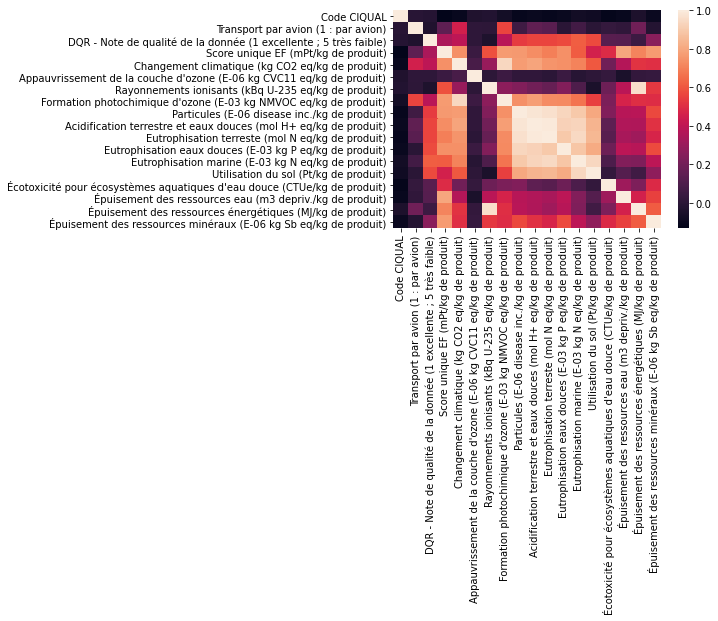



Visualisation des sous-groupes du groupe  fruits, légumes, légumineuses et oléagineux


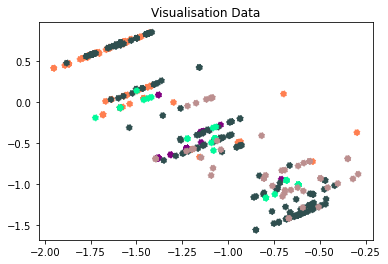



--------------------------------------------------
----------  CLUSTERING TECHNIQUE 01 --------------
--------------------------------------------------


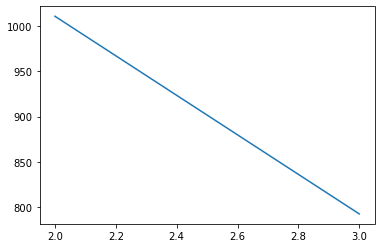

Le nombre de clusters proposés par la technique 01 : 3
Index de Dunn pour ce Clustering est :  0.012408795230652697
Index de Xie Benu pour ce Clustering est :  0.002307406625587537


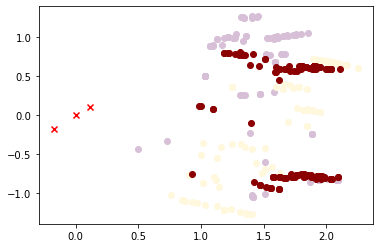



Cluster  0 : 
----------------------------------------
5   fruits
49   fruits à coque et graines oléagineuses
32   légumes
19   légumineuses
16   pommes de terre et autres tubercules
----------------------------------------

Cluster  1 : 
----------------------------------------
6   fruits
55   légumes
12   légumineuses
30   pommes de terre et autres tubercules
----------------------------------------

Cluster  2 : 
----------------------------------------
85   fruits
109   légumes
5   légumineuses
----------------------------------------



--------------------------------------------------
----------  CLUSTERING TECHNIQUE 02 --------------
--------------------------------------------------


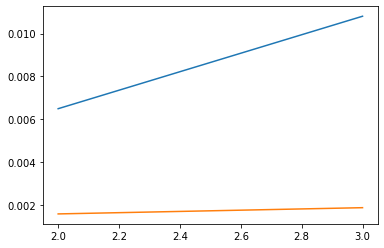

Le nombre de clusters proposés par la technique 01 : 2
Index de Dunn pour ce Clustering est :  0.006556167874739682
Index de Xie Benu pour ce Clustering est :  0.0017634148835582134


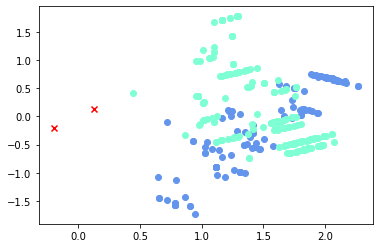

Cluster  0 : 
----------------------------------------
1   fruits
1   fruits à coque et graines oléagineuses
68   légumes
15   légumineuses
33   pommes de terre et autres tubercules
----------------------------------------

Cluster  1 : 
----------------------------------------
95   fruits
48   fruits à coque et graines oléagineuses
128   légumes
21   légumineuses
13   pommes de terre et autres tubercules
----------------------------------------





In [337]:
ClusteringEnSousGroupes(data_synthese,"fruits, légumes, légumineuses et oléagineux")

### Clustering Hierarchique

Dans ce qui suit nous allons appliquer le Clustering Hierarchique et afficher le resultat dans un Dendrogramme selon les 4 Linkage etudiées : 
- Centroid Linkage
- Simple Linkage
- Complete Linkage
- Average Linkage

In [113]:
data_synthese_bis = renvoyer(data_synthese,2,"fruits, légumes, légumineuses et oléagineux")

In [114]:
np.unique(extraire_col(data_synthese_bis,3),return_counts=True)

(array(['fruits', 'fruits à coque et graines oléagineuses', 'légumes',
        'légumineuses', 'pommes de terre et autres tubercules'],
       dtype=object),
 array([ 96,  49, 196,  36,  46], dtype=int64))

In [115]:
data_synthese_bis=dataPreparation(data_synthese_bis)[0]
print(data_synthese_bis.shape)
Y = np.array(extraire_col(data_synthese_bis,0))
# renvoie les variables en transformant les categorielles en numeriques grace au dummies 
X = pd.get_dummies(data_synthese_bis.drop(columns=["Sous-groupe d'aliment"]))
X = clust.normalisation(X)
X = np.array(X)

(423, 6)


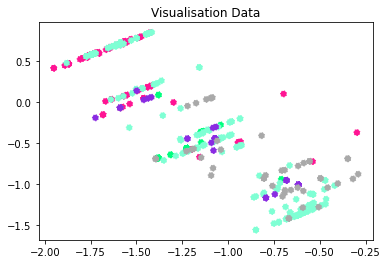

In [116]:
ut.visualiser_Multi(X,encode(Y),"Visualisation Data",5)

In [117]:
data_synthese_bis = renvoyer(data_synthese,2,"fruits, légumes, légumineuses et oléagineux")
data_synthese_bis=dataPreparation(data_synthese_bis)[0]
data_synthese_bis = pd.get_dummies(data_synthese_bis)
data_synthese_bis = clust.normalisation(data_synthese_bis)

Nous allons selectionner 50 exemples ( pour ne pas encombrer le dendogramme) et afficher leurs clustering en hierarchique. 

In [118]:
indexes = [rd.randint(0,422) for i in range(50)]
data_synthese_bis = data_synthese_bis.iloc[indexes,:]
data_synthese_bis.shape

(50, 27)

##### à noter 

les fonctions "separer" et "visualiserClusters" ont ete devloppées en bonus dans le TME9 .
- "separer" renvoie les "nb" ( fourni en parametre) clusters associés à la decomposition faite dans le clustering hierarchique readapté ( renvoie en plus des centroides les partitions aussi )
- "visualiserClusters" permet de visualiser ces clusters un avec un jeu de couleurs associé.

#### Centroid Linkage

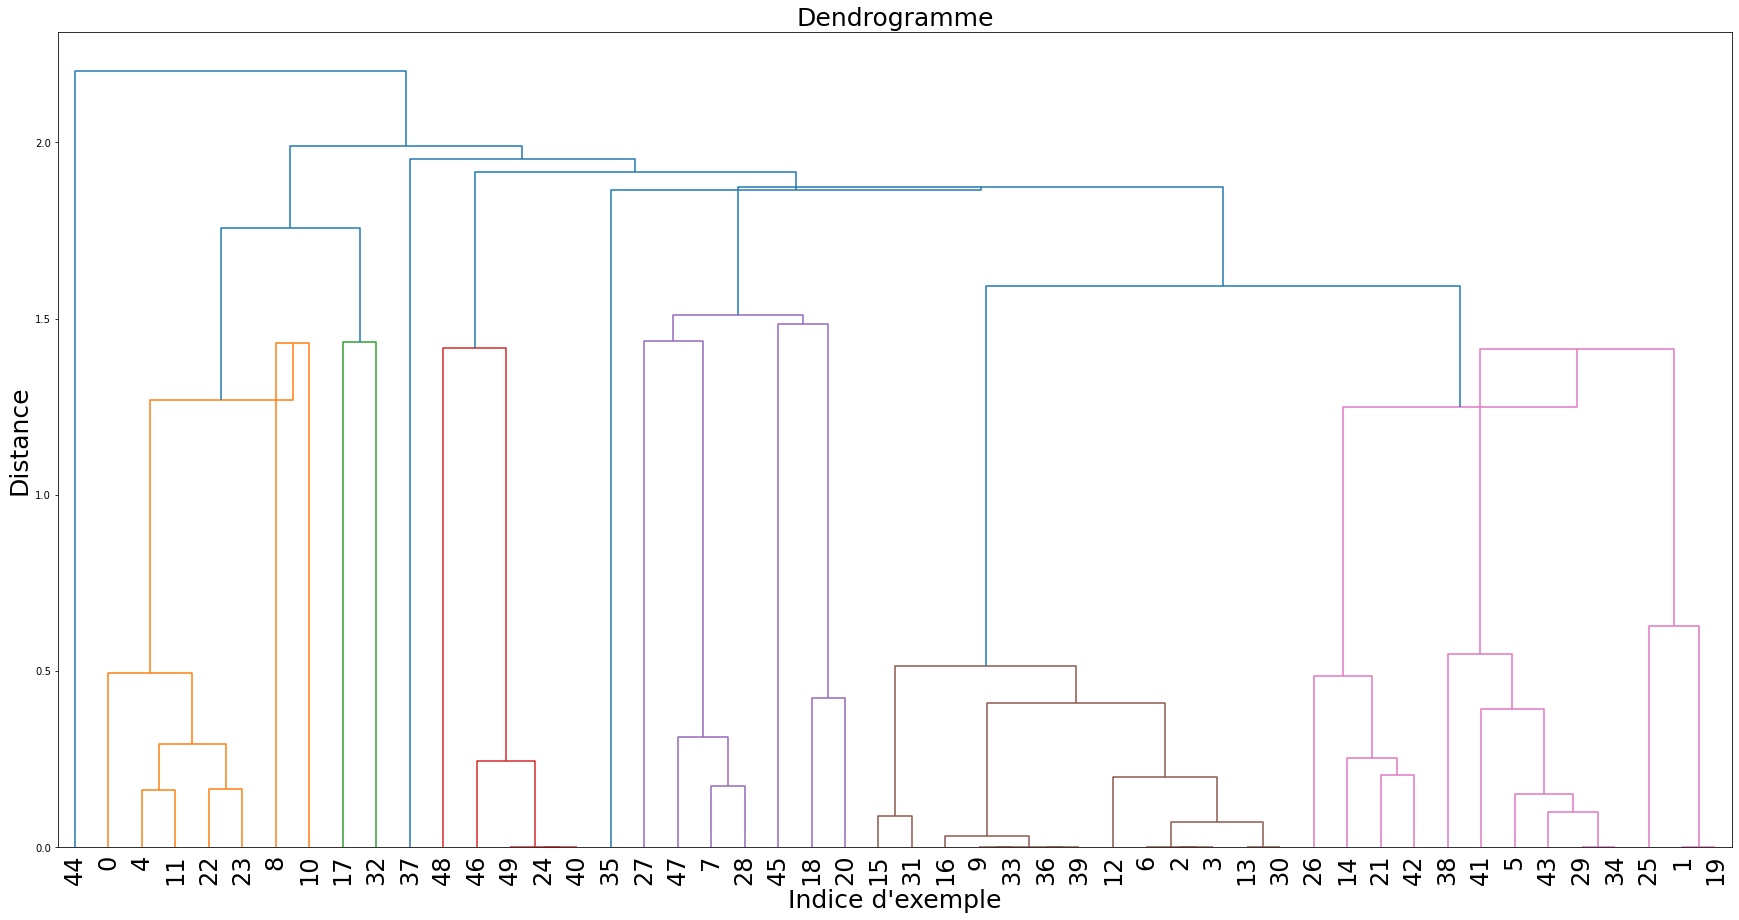

In [119]:
clustering_centroid = clust.clustering_hierarchique(data_synthese_bis,verbose=False,dendrogramme=True)[1]

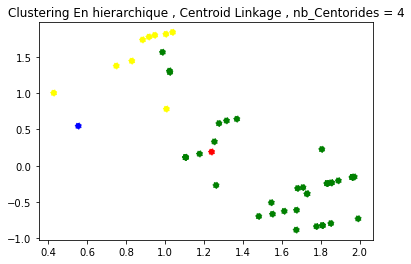

In [120]:
clusters = clust.separer(data_synthese_bis,clustering_centroid,4)
clust.visualiserClusters(np.array(data_synthese_bis),"Clustering En hierarchique , Centroid Linkage , nb_Centorides = 4",clusters)

#### Complete Linkage

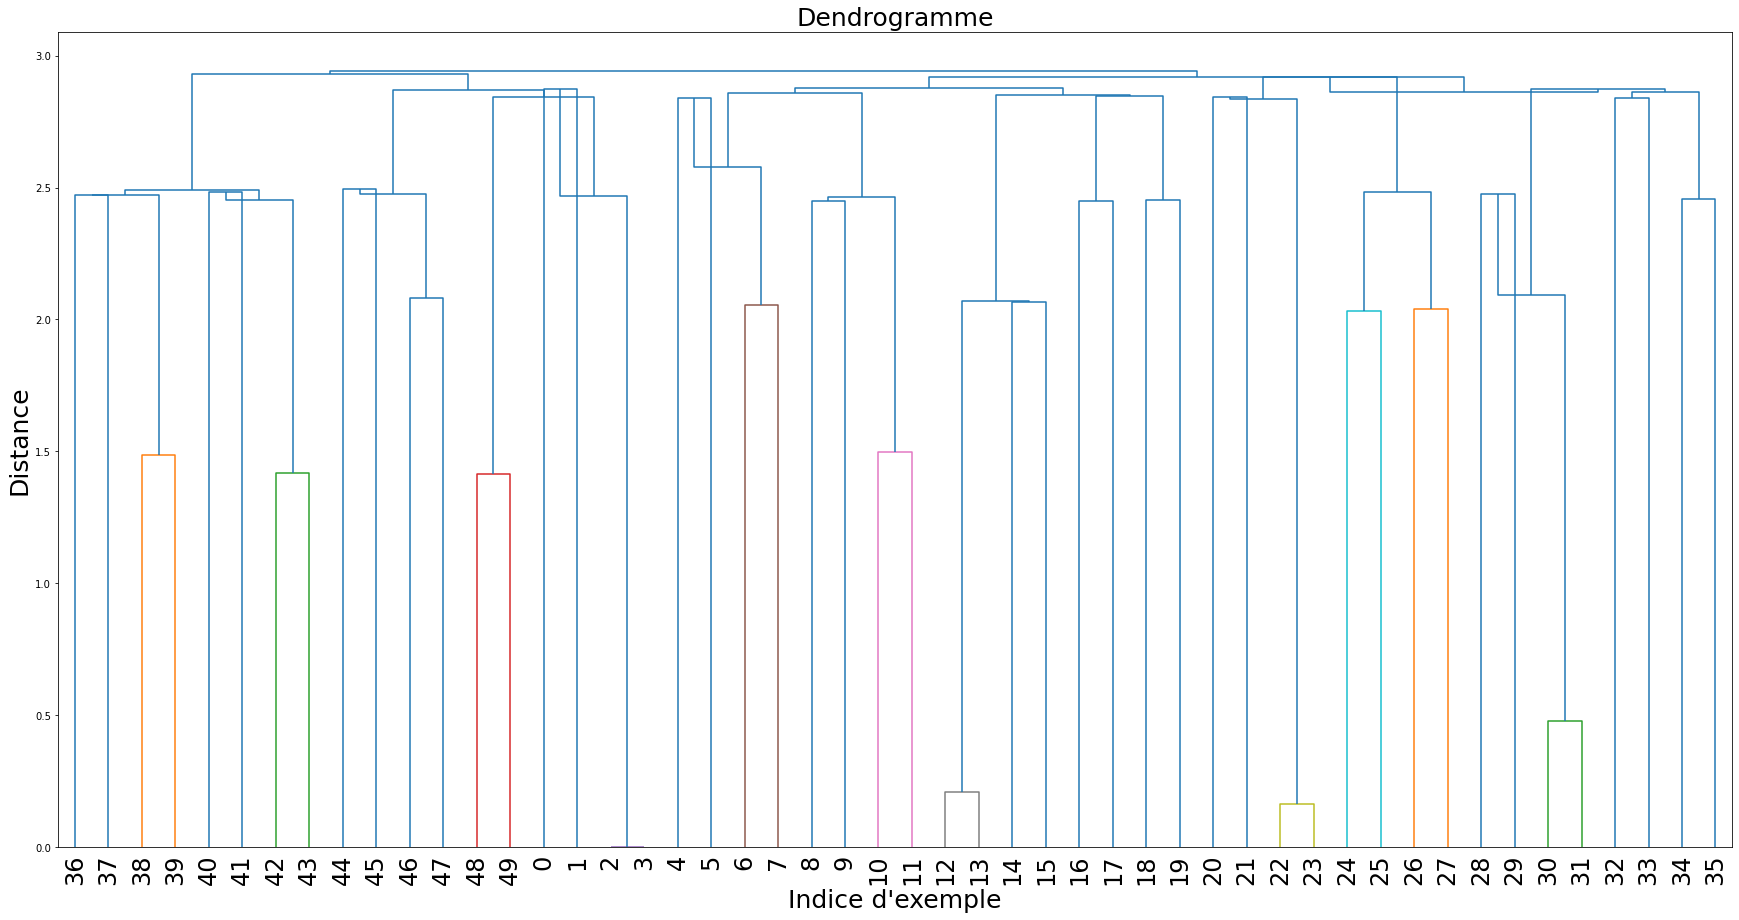

In [121]:
clustering_centroid = clust.clustering_hierarchique_complete(data_synthese_bis,verbose=False,dendrogramme=True)

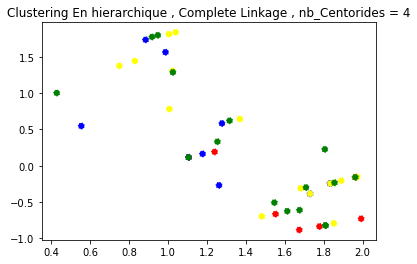

In [122]:
clusters = clust.separer(data_synthese_bis,clustering_centroid,4)
clust.visualiserClusters(np.array(data_synthese_bis),"Clustering En hierarchique , Complete Linkage , nb_Centorides = 4",clusters)

#### Simple Linkage

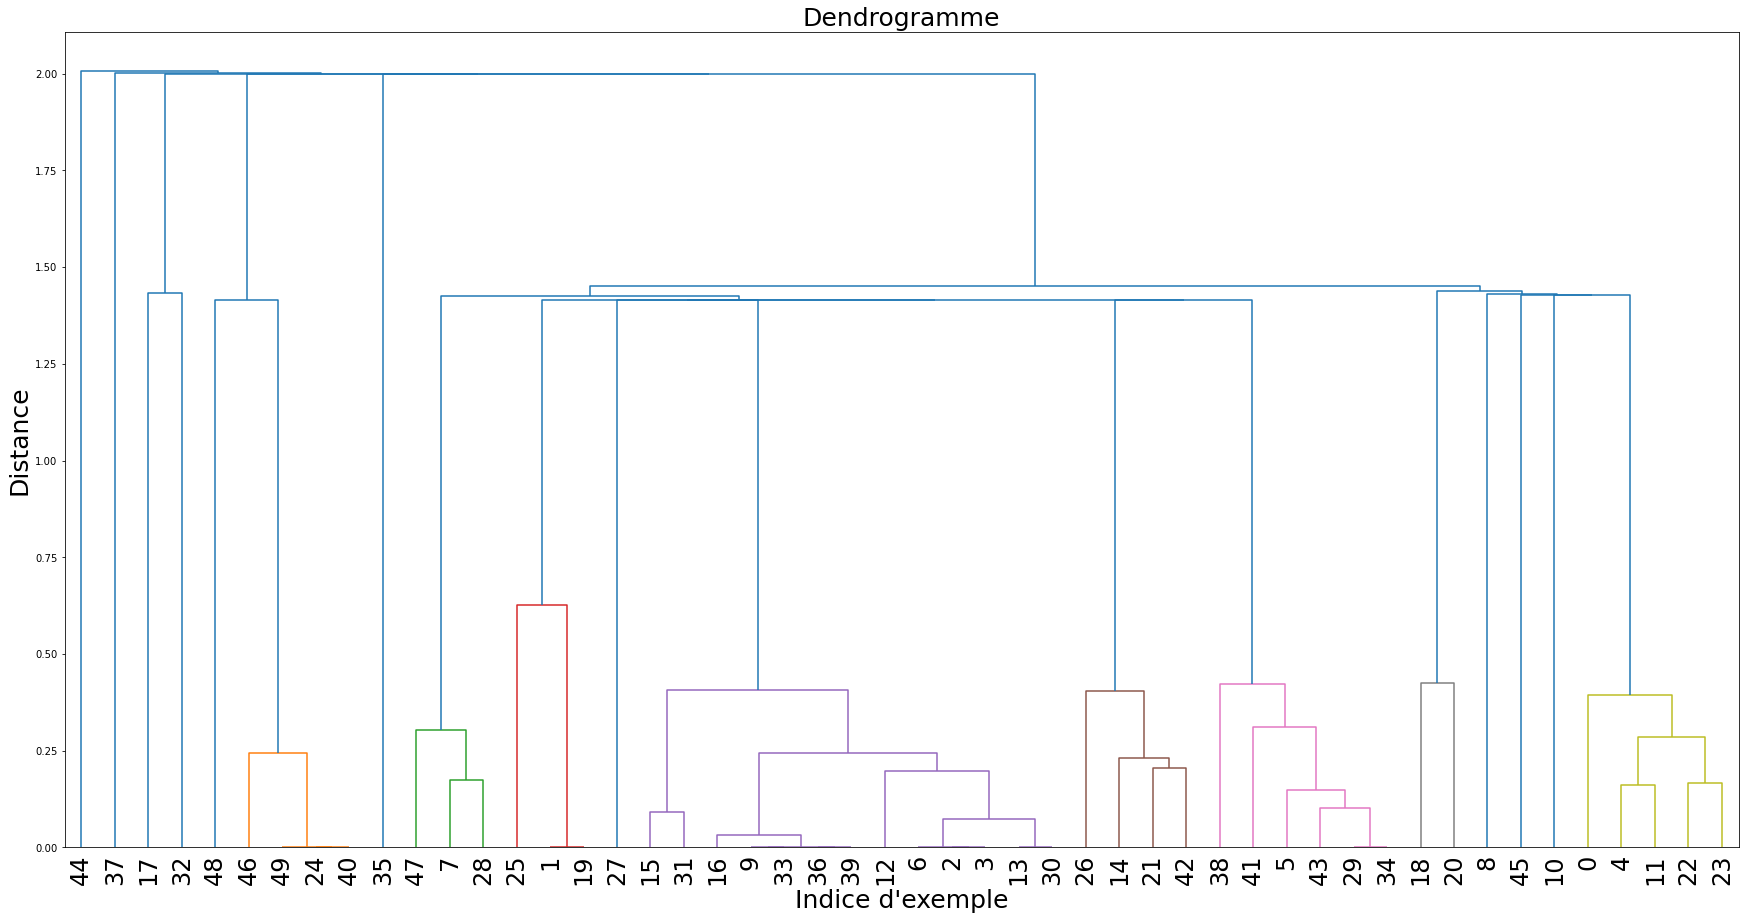

In [123]:
clustering_centroid = clust.clustering_hierarchique_simple(data_synthese_bis,verbose=False,dendrogramme=True)

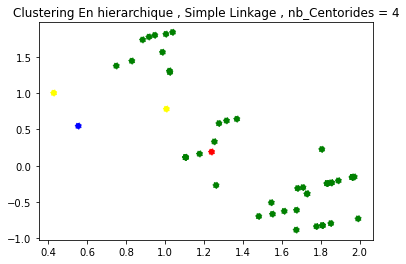

In [124]:
clusters = clust.separer(data_synthese_bis,clustering_centroid,4)
clust.visualiserClusters(np.array(data_synthese_bis),"Clustering En hierarchique , Simple Linkage , nb_Centorides = 4",clusters)

#### Average Linkage

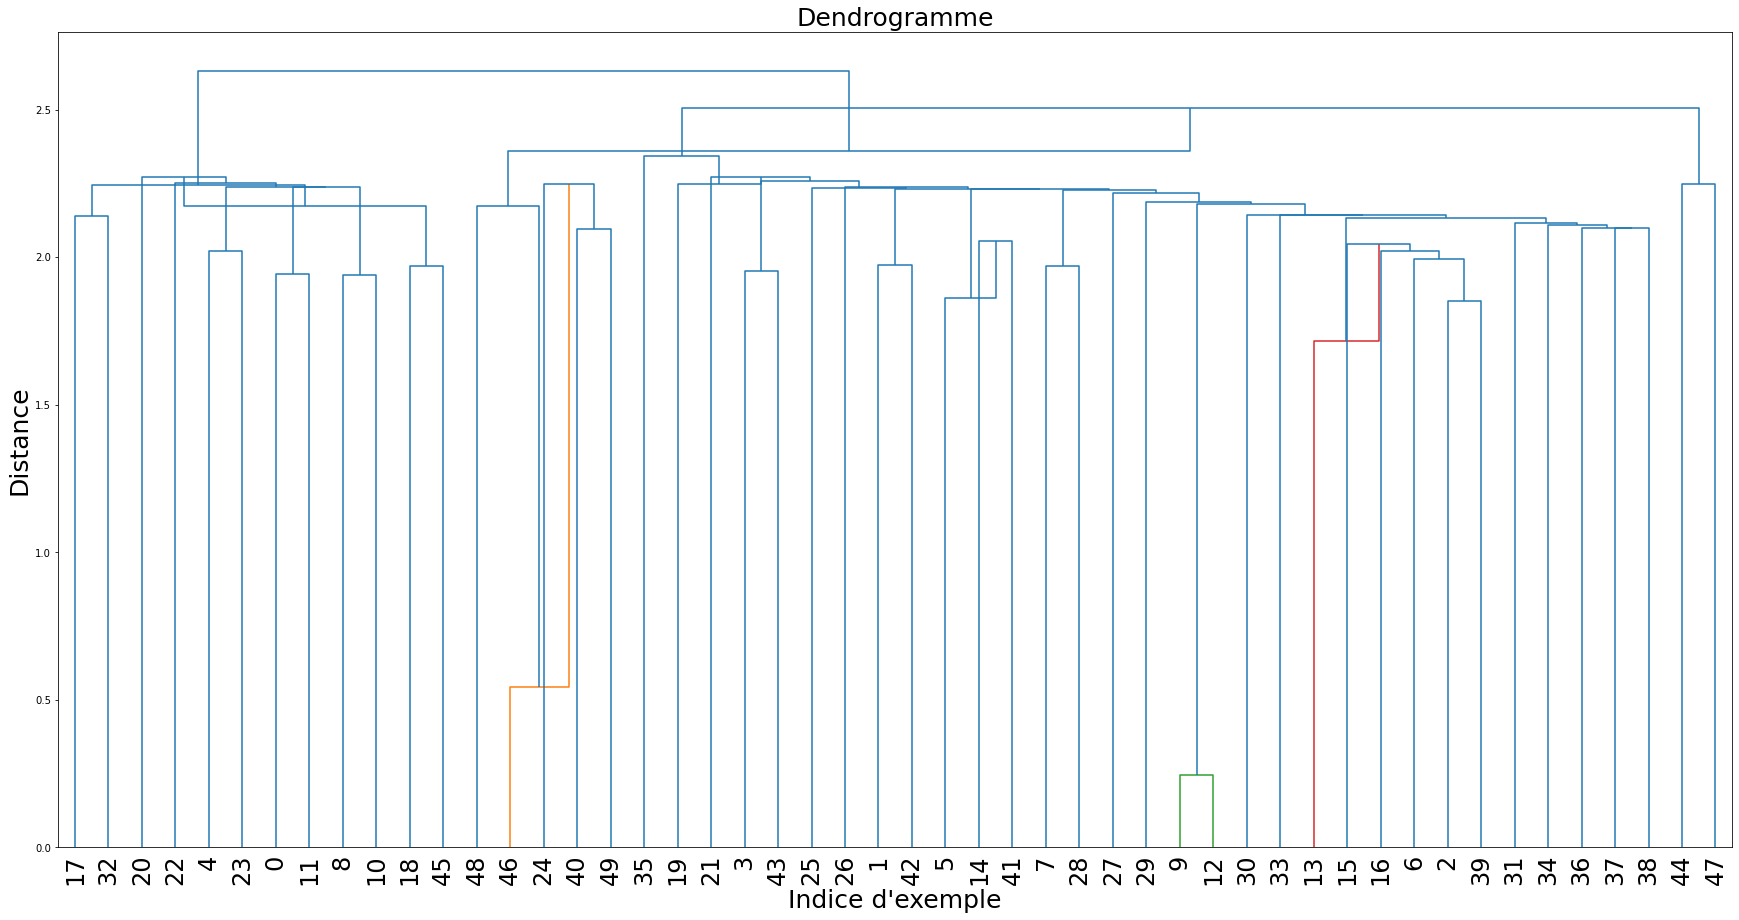

In [125]:
clustering_centroid = clust.clustering_hierarchique_average(data_synthese_bis,verbose=False,dendrogramme=True)

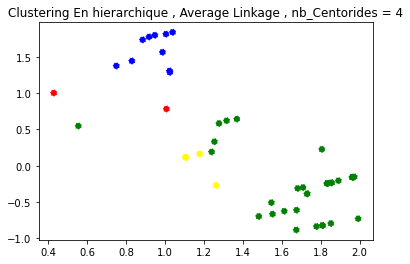

In [126]:
clusters = clust.separer(data_synthese_bis,clustering_centroid,4)
clust.visualiserClusters(np.array(data_synthese_bis),"Clustering En hierarchique , Average Linkage , nb_Centorides = 4",clusters)

## Le groupe produits céréaliers

### K-Moyennes (K-Means) 

----------------------------------------------------------------------------------
----------  CLUSTERING EN SOUS GROUPE  produits céréaliers --------------
------------------------------------------------------------------------------------



La repartition des sous-groupes d groupe  produits céréaliers
(array(['céréales de petit-déjeuner et biscuits',
       'farines et pâtes à tarte', 'gâteaux et pâtisseries',
       'pains et viennoiseries', 'pâtes, riz et céréales'], dtype=object), array([125,  41,  76,  73,  60], dtype=int64))


Matrice de Correlation en HeatMap


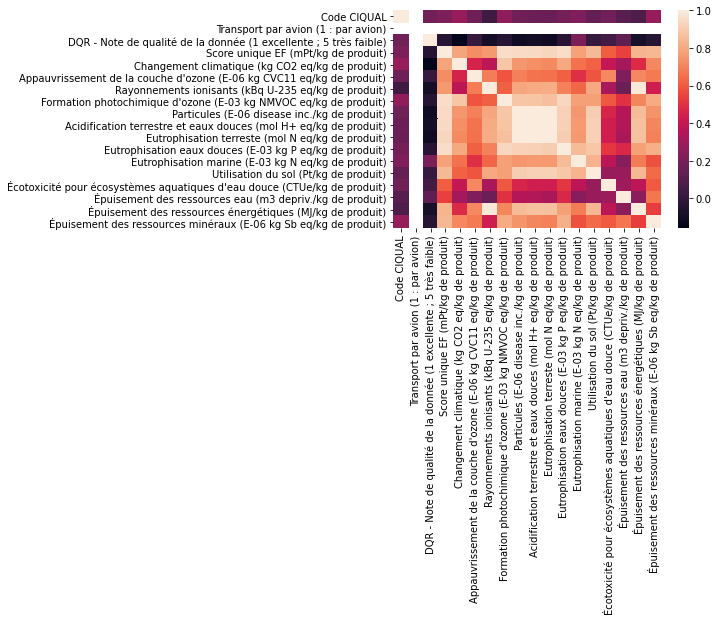



Visualisation des sous-groupes du groupe  produits céréaliers


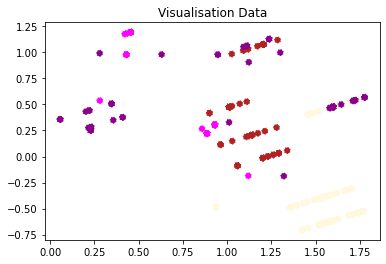



--------------------------------------------------
----------  CLUSTERING TECHNIQUE 01 --------------
--------------------------------------------------


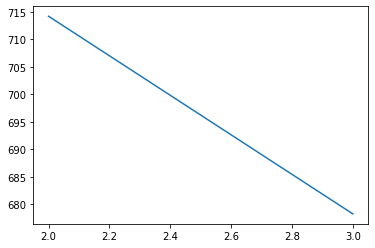

Le nombre de clusters proposés par la technique 01 : 3
Index de Dunn pour ce Clustering est :  0.01427862613934361
Index de Xie Benu pour ce Clustering est :  0.0026920624538264546


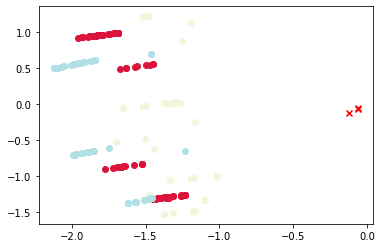



Cluster  0 : 
----------------------------------------
76   gâteaux et pâtisseries
73   pains et viennoiseries
----------------------------------------

Cluster  1 : 
----------------------------------------
41   farines et pâtes à tarte
34   pâtes, riz et céréales
----------------------------------------

Cluster  2 : 
----------------------------------------
125   céréales de petit-déjeuner et biscuits
26   pâtes, riz et céréales
----------------------------------------



--------------------------------------------------
----------  CLUSTERING TECHNIQUE 02 --------------
--------------------------------------------------


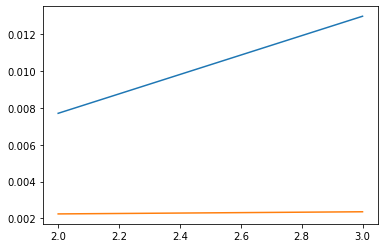

Le nombre de clusters proposés par la technique 01 : 2
Index de Dunn pour ce Clustering est :  0.007851735442952706
Index de Xie Benu pour ce Clustering est :  0.0021911210753953673


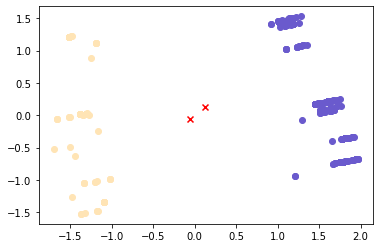

Cluster  0 : 
----------------------------------------
41   farines et pâtes à tarte
34   pâtes, riz et céréales
----------------------------------------

Cluster  1 : 
----------------------------------------
125   céréales de petit-déjeuner et biscuits
76   gâteaux et pâtisseries
73   pains et viennoiseries
26   pâtes, riz et céréales
----------------------------------------





In [309]:
ClusteringEnSousGroupes(data_synthese,"produits céréaliers")

### Clustering Hierarchique

In [203]:
data_synthese_bis = renvoyer(data_synthese,2,"produits céréaliers")

In [204]:
np.unique(extraire_col(data_synthese_bis,3),return_counts=True)

(array(['céréales de petit-déjeuner et biscuits',
        'farines et pâtes à tarte', 'gâteaux et pâtisseries',
        'pains et viennoiseries', 'pâtes, riz et céréales'], dtype=object),
 array([125,  41,  76,  73,  60], dtype=int64))

In [205]:
data_synthese_bis=dataPreparation(data_synthese_bis)[0]
Y = np.array(extraire_col(data_synthese_bis,0))
# renvoie les variables en transformant les categorielles en numeriques grace au dummies 
X = pd.get_dummies(data_synthese_bis.drop(columns=["Sous-groupe d'aliment"]))
X = clust.normalisation(X)
X = np.array(X)

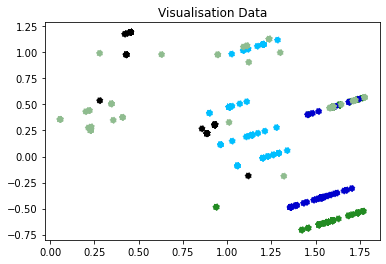

In [206]:
ut.visualiser_Multi(X,encode(Y),"Visualisation Data",5)

In [207]:
data_synthese_bis = renvoyer(data_synthese,2,"produits céréaliers")
data_synthese_bis = dataPreparation(data_synthese_bis)[0]
data_synthese_bis = pd.get_dummies(data_synthese_bis)
data_synthese_bis = clust.normalisation(data_synthese_bis)
data_synthese_bis.shape

(375, 22)

In [208]:
indexes = [rd.randint(0,374) for i in range(50)]
data_synthese_bis = data_synthese_bis.iloc[indexes,:]
data_synthese_bis.shape

(50, 22)

#### Centroid Linkage

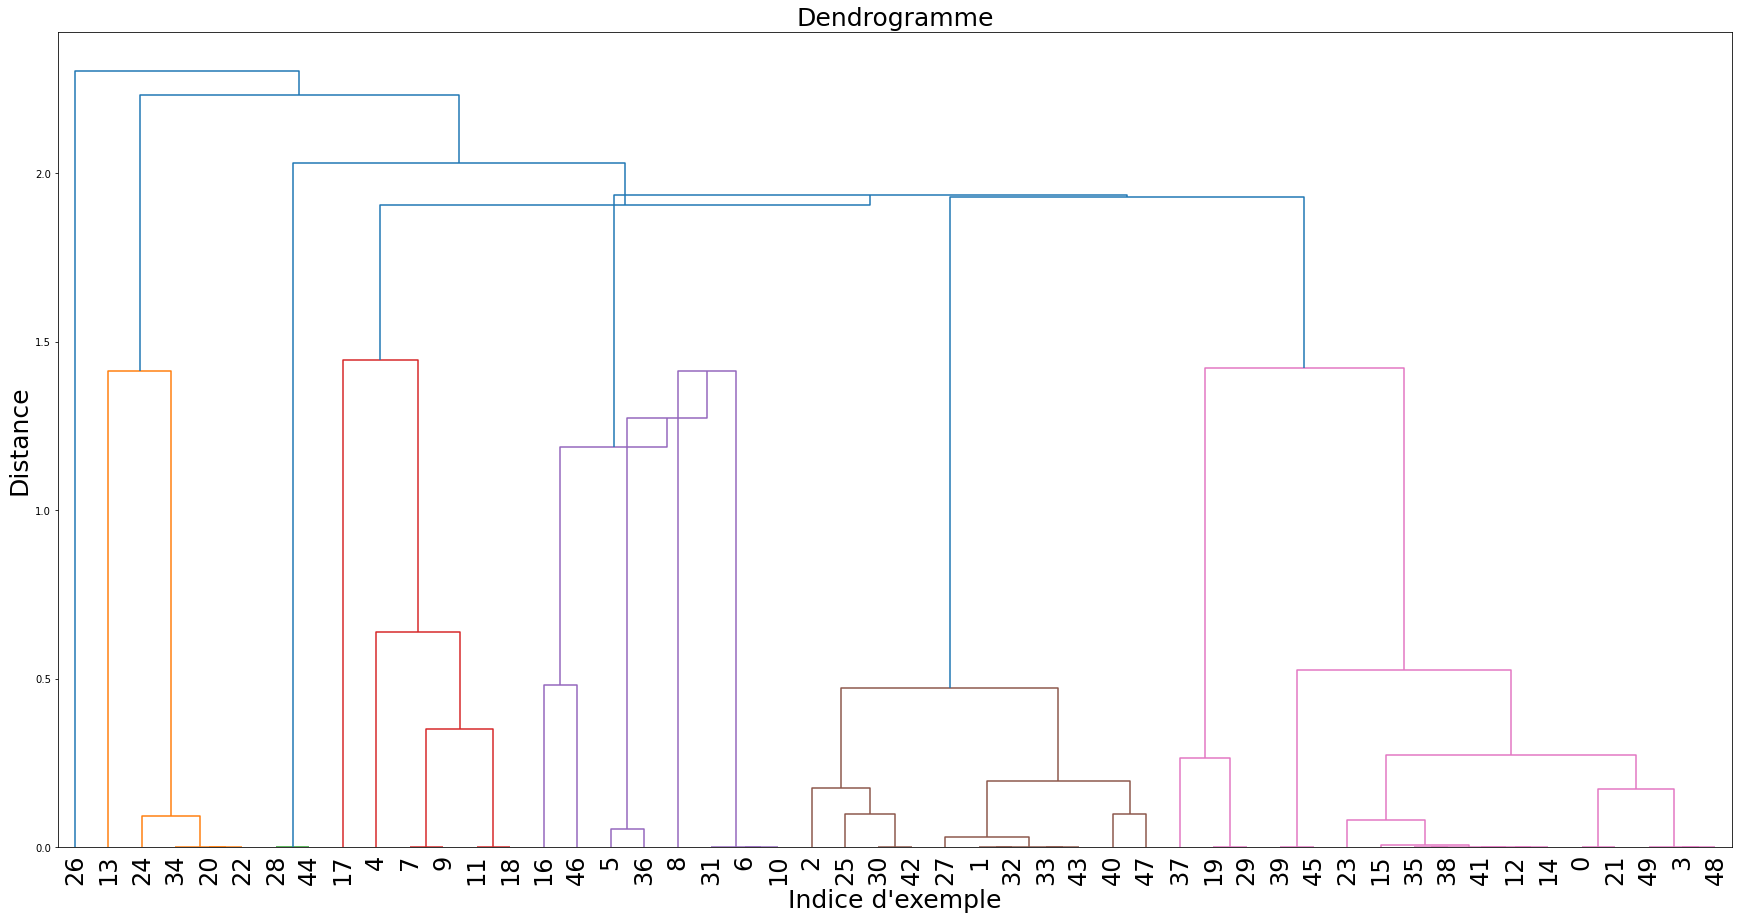

In [209]:
clustering_centroid = clust.clustering_hierarchique(data_synthese_bis,verbose=False,dendrogramme=True)[1]

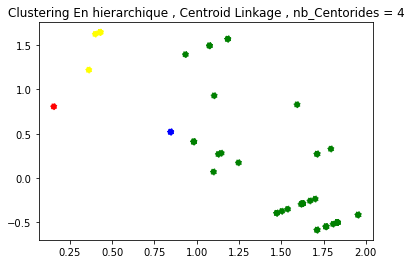

In [210]:
clusters = clust.separer(data_synthese_bis,clustering_centroid,4)
clust.visualiserClusters(np.array(data_synthese_bis),"Clustering En hierarchique , Centroid Linkage , nb_Centorides = 4",clusters)

#### Complete Linkage

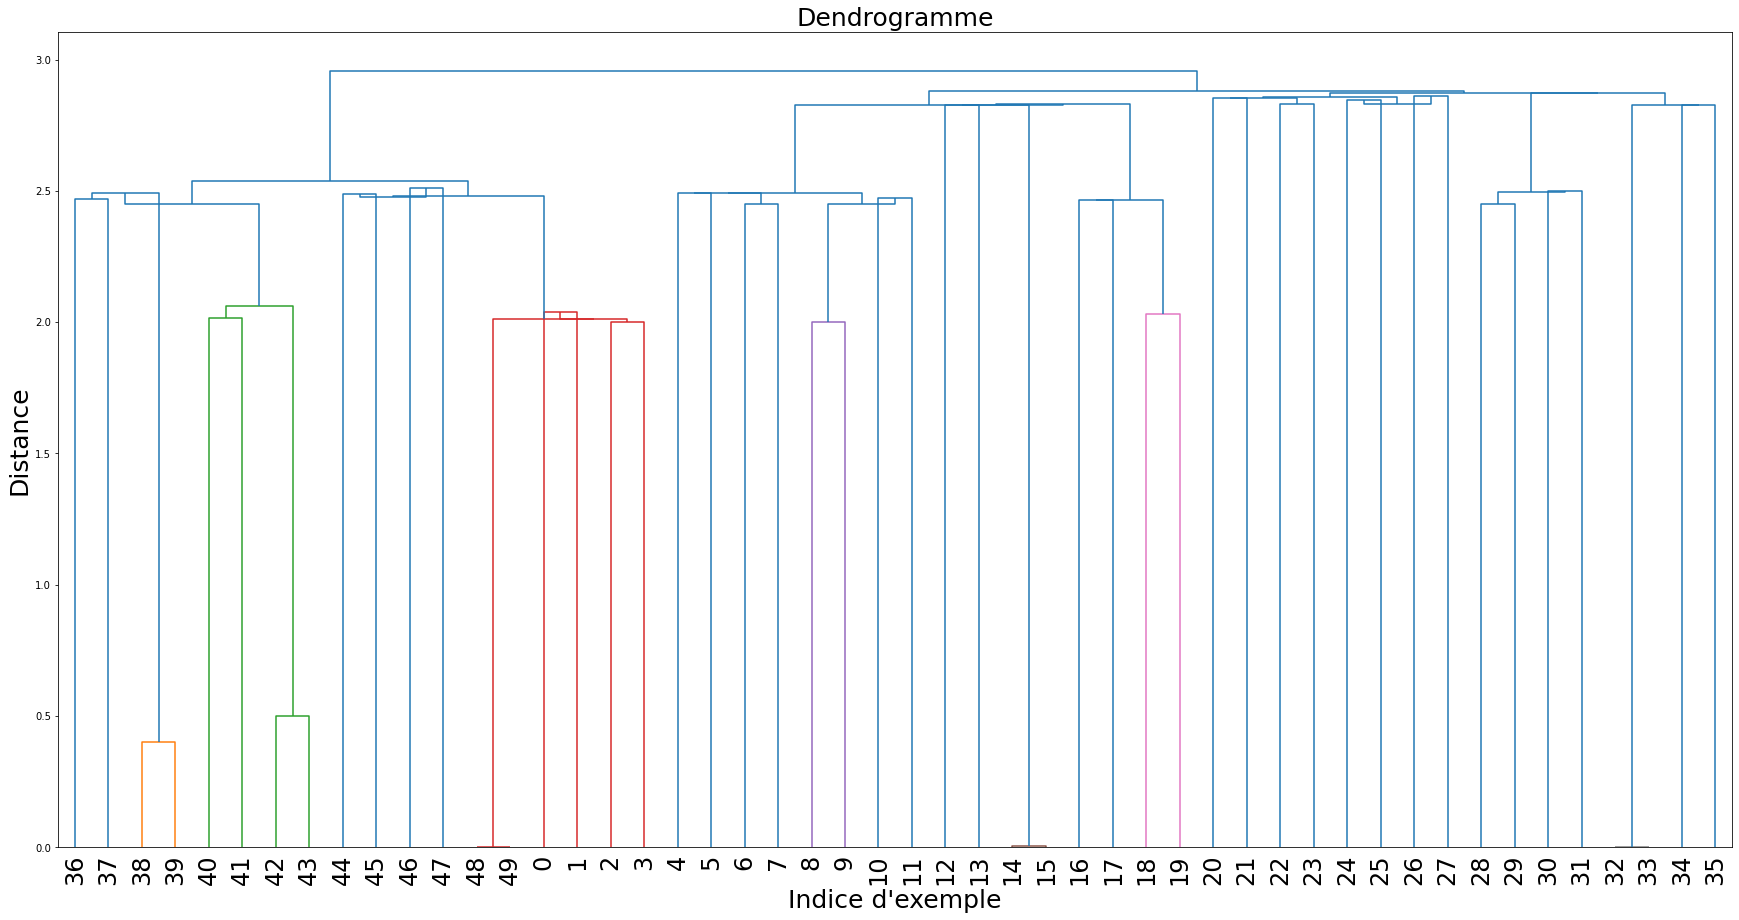

In [212]:
clustering_centroid = clust.clustering_hierarchique_complete(data_synthese_bis,verbose=False,dendrogramme=True)

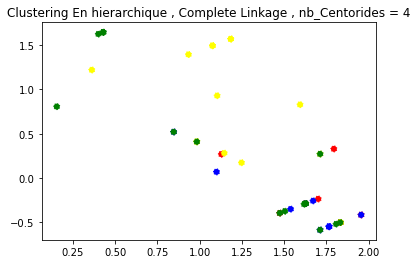

In [213]:
clusters = clust.separer(data_synthese_bis,clustering_centroid,4)
clust.visualiserClusters(np.array(data_synthese_bis),"Clustering En hierarchique , Complete Linkage , nb_Centorides = 4",clusters)

#### Simple Linkage

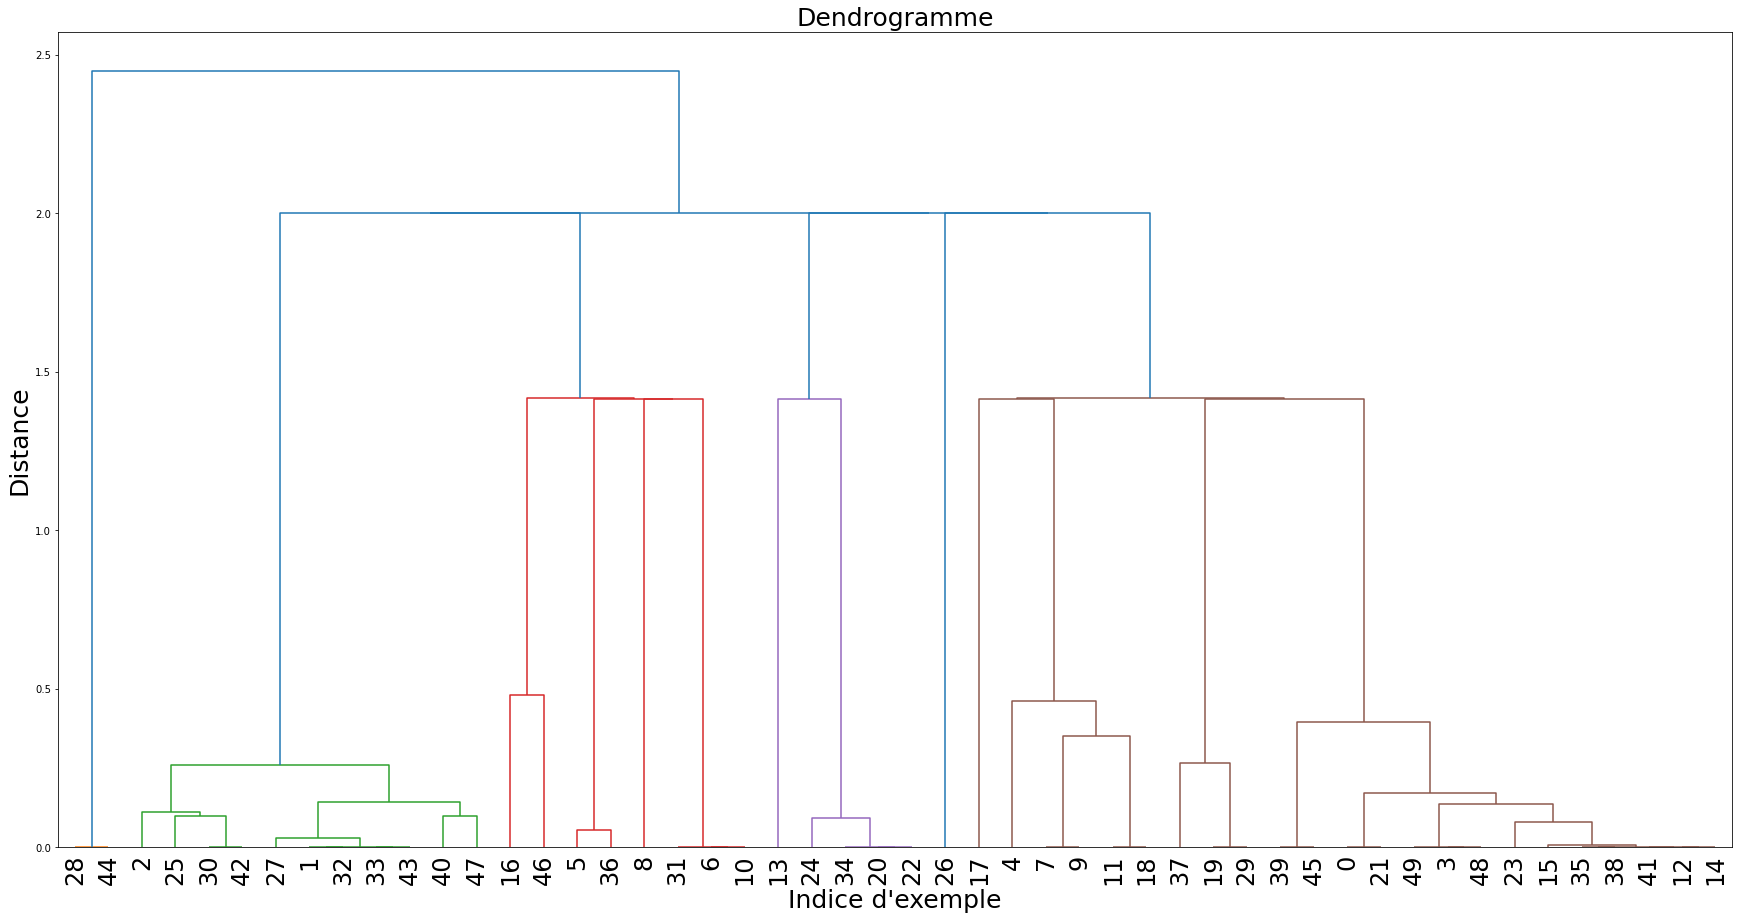

In [214]:
clustering_centroid = clust.clustering_hierarchique_simple(data_synthese_bis,verbose=False,dendrogramme=True)

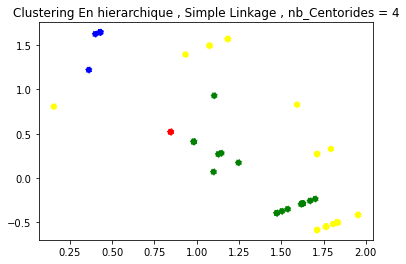

In [215]:
clusters = clust.separer(data_synthese_bis,clustering_centroid,4)
clust.visualiserClusters(np.array(data_synthese_bis),"Clustering En hierarchique , Simple Linkage , nb_Centorides = 4",clusters)

#### Average Linkage

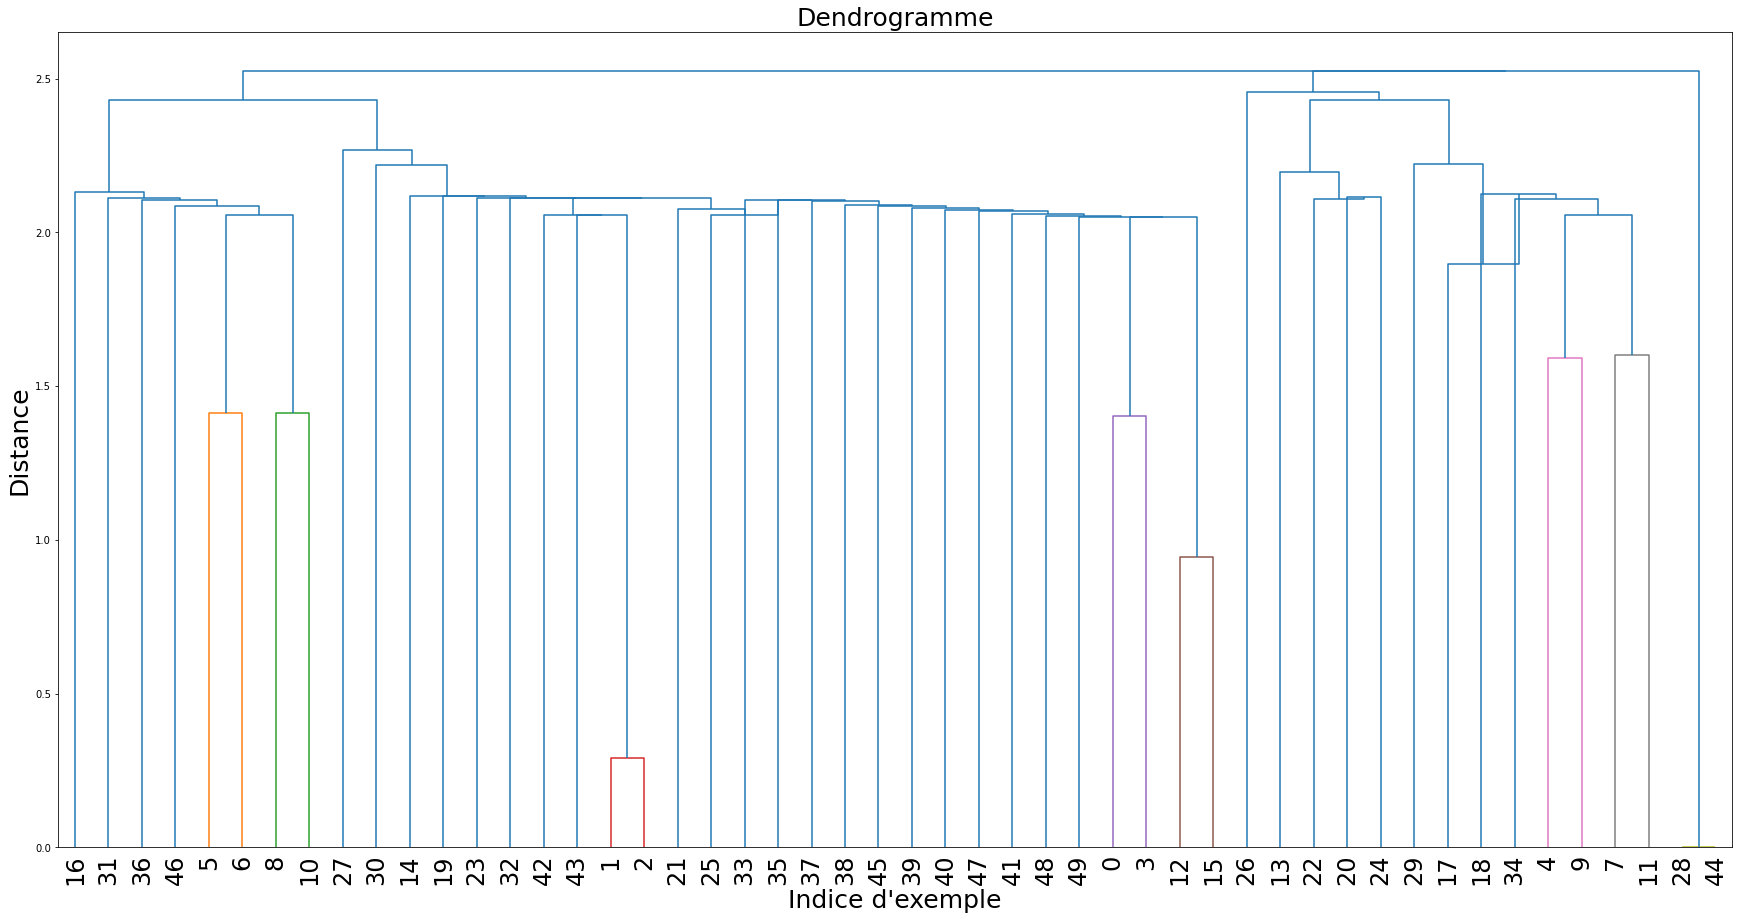

In [216]:
clustering_centroid = clust.clustering_hierarchique_average(data_synthese_bis,verbose=False,dendrogramme=True)

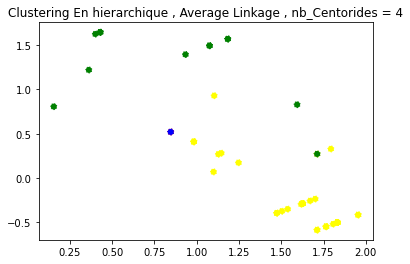

In [217]:
clusters = clust.separer(data_synthese_bis,clustering_centroid,4)
clust.visualiserClusters(np.array(data_synthese_bis),"Clustering En hierarchique , Average Linkage , nb_Centorides = 4",clusters)

# Clustering en Groupe d'aliment

In [318]:
data_synthese

,Code AGB,Code CIQUAL,Groupe d'aliment,Sous-groupe d'aliment,Nom du Produit en Français,LCI Name,Saisonnalité,Transport par avion (1 : par avion),Livraison,Matériau d'emballage,...,Particules (E-06 disease inc./kg de produit),Acidification terrestre et eaux douces (mol H+ eq/kg de produit),Eutrophisation terreste (mol N eq/kg de produit),Eutrophisation eaux douces (E-03 kg P eq/kg de produit),Eutrophisation marine (E-03 kg N eq/kg de produit),Utilisation du sol (Pt/kg de produit),Écotoxicité pour écosystèmes aquatiques d'eau douce (CTUe/kg de produit),Épuisement des ressources eau (m3 depriv./kg de produit),Épuisement des ressources énergétiques (MJ/kg de produit),Épuisement des ressources minéraux (E-06 kg Sb eq/kg de produit)
0,13712,13712,"fruits, légumes, légumineuses et oléagineux",fruits,"Abricot au sirop léger, appertisé, égoutté","Apricot, canned in light syrup, drained",mix de consommation FR,0,Ambiant (moyenne),Acier,...,0.096413,0.009301,0.031766,0.410555,1.502775,44.823181,62.195218,1.630637,47.237697,2.938064
1,13713,13713,"fruits, légumes, légumineuses et oléagineux",fruits,"Abricot au sirop léger, appertisé, non égoutté","Apricot, canned in light syrup, not drained",mix de consommation FR,0,Ambiant (moyenne),Acier,...,0.059314,0.005726,0.019499,0.235366,0.797791,27.901738,36.285914,1.010960,29.397697,1.823726
2,13714,13714,"fruits, légumes, légumineuses et oléagineux",fruits,"Abricot au sirop, appertisé, égoutté","Apricot, in syrup, canned, drained",mix de consommation FR,0,Ambiant (moyenne),Acier,...,0.096413,0.009301,0.031766,0.410555,1.502775,44.823181,62.195218,1.630637,47.237697,2.938064
3,13715,13715,"fruits, légumes, légumineuses et oléagineux",fruits,"Abricot au sirop, appertisé, non égoutté","Apricot, in syrup, canned, not drained",mix de consommation FR,0,Ambiant (moyenne),Acier,...,0.059314,0.005726,0.019499,0.235366,0.797791,27.901738,36.285914,1.010960,29.397697,1.823726
4,13000,13000,"fruits, légumes, légumineuses et oléagineux",fruits,"Abricot, dénoyauté, cru","Apricot, pitted, raw",mix de consommation FR,0,Ambiant (moyenne),LPDE,...,0.061462,0.007254,0.025954,0.204244,0.943669,43.838644,41.957928,1.412878,17.123820,2.173328
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2474,19592,19592,lait et produits laitiers,produits laitiers frais et assimilés,"Yaourt, lait fermenté ou spécialité laitière, ...","Yogurt, fermented milk or dairy specialty, wit...",mix de consommation FR,0,Glacé,PP,...,0.173049,0.022129,0.092536,0.257436,15.198522,136.090810,216.954380,2.253106,26.865322,5.020883
2475,19593,19593,lait et produits laitiers,produits laitiers frais et assimilés,"Yaourt, lait fermenté ou spécialité laitière, ...","Yogurt, fermented milk or dairy specialty, plain",mix de consommation FR,0,Glacé,PP,...,0.155803,0.022678,0.095881,0.235488,13.642379,133.154710,24.979408,0.636518,25.746521,1.838004
2476,19594,19594,lait et produits laitiers,produits laitiers frais et assimilés,"Yaourt, lait fermenté ou spécialité laitière, ...","Yogurt, fermented milk or dairy specialty, pla...",mix de consommation FR,0,Glacé,PP,...,0.155803,0.022678,0.095881,0.235488,13.642379,133.154710,24.979408,0.636518,25.746521,1.838004
2477,19598,19598,lait et produits laitiers,produits laitiers frais et assimilés,"Yaourt, lait fermenté ou spécialité laitière, ...","Yogurt, fermented milk or dairy specialty, pla...",mix de consommation FR,0,Glacé,PP,...,0.165113,0.023417,0.097687,0.297081,14.777646,138.486420,32.692803,0.862339,27.136623,2.858934


In [ ]:
print(np.unique(extraire_col(data_synthese,2),return_counts=True))

### K-Moyennes

In [350]:
def ClusteringEnGroupes(dataframe):

    print("--------------------------------------------------------------------------")
    print("---------------------  CLUSTERING EN GROUPE ------------------------------")
    print("---------------------------------------------------------------------------")
    print("\n\n")
    
    # Pour des raisons de visibilté
    data_synthese_bis = dataframe
    
    # Afficher la repertitions des sous groupes de ce groupe
    print("La repartition des des groupes d'aliments ")
    print(np.unique(extraire_col(data_synthese_bis,2),return_counts=True))
    print("\n")
    
    # Afficher la heatmap de la matrice de la correlation
    print("Matrice de Correlation en HeatMap")
    sns.heatmap(data_synthese_bis.corr())
    plt.show()
    print("\n")
    
    # Nettoyage des données
    data_synthese_bis=dataPreparationbis(data_synthese_bis)[0]
    # Extraire Y qui est la colonne sous-groupe
    Y = np.array(extraire_col(data_synthese_bis,0))
    # renvoie les variables en transformant les categorielles en numeriques grace au dummies 
    X = pd.get_dummies(data_synthese_bis.drop(columns=["Groupe d'aliment"]))
    X = clust.normalisation(X)
    X = np.array(X)
    
    #Visualiser le jeu de données
    print("Visualisation des groupes ")
    a,v = np.unique(Y,return_counts=True)
    ut.visualiser_Multi(X,encode(Y),"Visualisation Data",len(a))
    print("\n")
    
    
    # Reprendre les données de base et les nettoyer et normaliser
    data_synthese_bis=dataPreparationbis(dataframe)[0]
    data_synthese_bis = pd.get_dummies(data_synthese_bis)
    data_synthese_bis = clust.normalisation(data_synthese_bis)
    
    
    
    max_iter = 4
    
    print("--------------------------------------------------")
    print("----------  CLUSTERING TECHNIQUE 01 --------------")
    print("--------------------------------------------------")
    
    
    
    K_opt = clustTech1(max_iter,data_synthese_bis)
    print("Le nombre de clusters proposés par la technique 01 :",K_opt)
    
    
    les_centres, l_affectation = clust.kmoyennes(K_opt, data_synthese_bis, 0.05,100)
    print("Index de Dunn pour ce Clustering est : ",clust.index_dunn(data_synthese_bis,l_affectation))
    print("Index de Xie Benu pour ce Clustering est : ",clust.index_XieBeni(data_synthese_bis,les_centres,l_affectation))
    clust.affiche_resultat(data_synthese_bis,les_centres,l_affectation)
    print("\n")
    
    
    evaluationSemantique(Y,l_affectation,True)
    print("\n")
    
    
    print("--------------------------------------------------")
    print("----------  CLUSTERING TECHNIQUE 02 --------------")
    print("--------------------------------------------------")
    
    K_opt = clustTech2(max_iter,data_synthese_bis)
    print("Le nombre de clusters proposés par la technique 01 :",K_opt)
    
    
    les_centres, l_affectation = clust.kmoyennes(K_opt, data_synthese_bis, 0.05,100)
    print("Index de Dunn pour ce Clustering est : ",clust.index_dunn(data_synthese_bis,l_affectation))
    print("Index de Xie Benu pour ce Clustering est : ",clust.index_XieBeni(data_synthese_bis,les_centres,l_affectation))
    clust.affiche_resultat(data_synthese_bis,les_centres,l_affectation)
    
    
    evaluationSemantique(Y,l_affectation,True)
    print("\n")
    

--------------------------------------------------------------------------
---------------------  CLUSTERING EN GROUPE ------------------------------
---------------------------------------------------------------------------



La repartition des des groupes d'aliments 
(array(['aides culinaires et ingrédients divers', 'aliments infantiles',
       'boissons', 'entrées et plats composés',
       'fruits, légumes, légumineuses et oléagineux', 'glaces et sorbets',
       'lait et produits laitiers', 'matières grasses',
       'produits céréaliers', 'produits sucrés',
       'viandes, œufs, poissons'], dtype=object), array([158,  33, 219, 281, 423,  25, 220,  56, 375,  53, 636], dtype=int64))


Matrice de Correlation en HeatMap


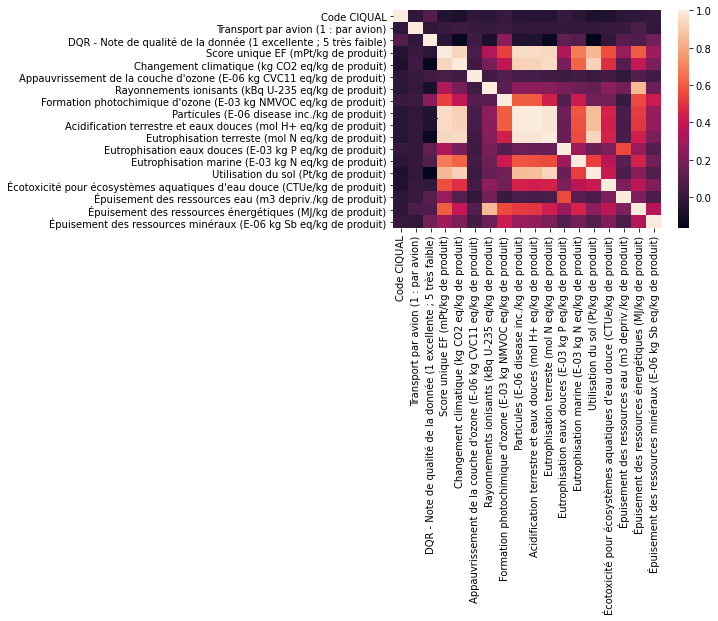



Visualisation des groupes 


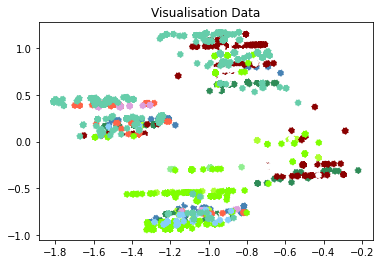



--------------------------------------------------
----------  CLUSTERING TECHNIQUE 01 --------------
--------------------------------------------------


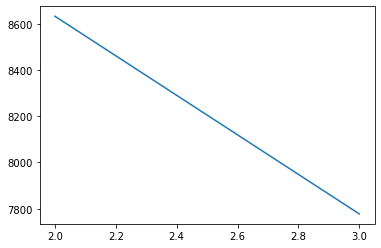

Le nombre de clusters proposés par la technique 01 : 3
Index de Dunn pour ce Clustering est :  0.0012274005743547933
Index de Xie Benu pour ce Clustering est :  0.00017202660459025742


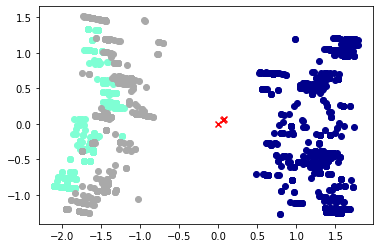



Cluster  0 : 
----------------------------------------
27   aides culinaires et ingrédients divers
2   aliments infantiles
41   boissons
43   entrées et plats composés
19   fruits, légumes, légumineuses et oléagineux
203   lait et produits laitiers
35   matières grasses
8   produits céréaliers
7   produits sucrés
363   viandes, œufs, poissons
----------------------------------------

Cluster  1 : 
----------------------------------------
35   aides culinaires et ingrédients divers
37   boissons
197   entrées et plats composés
80   fruits, légumes, légumineuses et oléagineux
27   produits céréaliers
245   viandes, œufs, poissons
----------------------------------------

Cluster  2 : 
----------------------------------------
96   aides culinaires et ingrédients divers
31   aliments infantiles
141   boissons
41   entrées et plats composés
324   fruits, légumes, légumineuses et oléagineux
25   glaces et sorbets
17   lait et produits laitiers
21   matières grasses
340   produits céréalier

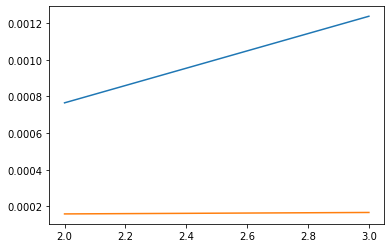

Le nombre de clusters proposés par la technique 01 : 2
Index de Dunn pour ce Clustering est :  0.0007798491652120877
Index de Xie Benu pour ce Clustering est :  0.00016715785054163332


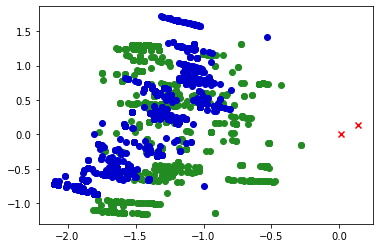

Cluster  0 : 
----------------------------------------
96   aides culinaires et ingrédients divers
31   aliments infantiles
141   boissons
50   entrées et plats composés
329   fruits, légumes, légumineuses et oléagineux
25   glaces et sorbets
130   lait et produits laitiers
21   matières grasses
348   produits céréaliers
46   produits sucrés
31   viandes, œufs, poissons
----------------------------------------

Cluster  1 : 
----------------------------------------
62   aides culinaires et ingrédients divers
2   aliments infantiles
78   boissons
231   entrées et plats composés
94   fruits, légumes, légumineuses et oléagineux
90   lait et produits laitiers
35   matières grasses
27   produits céréaliers
7   produits sucrés
605   viandes, œufs, poissons
----------------------------------------





In [351]:
ClusteringEnGroupes(data_synthese)

### Clustering Hierarchique

{'Score unique EF (mPt/kg de produit)', 'Changement climatique (kg CO2 eq/kg de produit)', "Écotoxicité pour écosystèmes aquatiques d'eau douce (CTUe/kg de produit)", 'Épuisement des ressources eau (m3 depriv./kg de produit)', 'Eutrophisation marine (E-03 kg N eq/kg de produit)', 'Particules (E-06 disease inc./kg de produit)', "Formation photochimique d'ozone (E-03 kg NMVOC eq/kg de produit)", 'Utilisation du sol (Pt/kg de produit)', 'Rayonnements ionisants (kBq U-235 eq/kg de produit)', 'Eutrophisation eaux douces (E-03 kg P eq/kg de produit)', 'Épuisement des ressources minéraux (E-06 kg Sb eq/kg de produit)', 'Épuisement des ressources énergétiques (MJ/kg de produit)', 'Acidification terrestre et eaux douces (mol H+ eq/kg de produit)', "Appauvrissement de la couche d'ozone (E-06 kg CVC11 eq/kg de produit)", 'Eutrophisation terreste (mol N eq/kg de produit)'}
Visualisation des groupes 


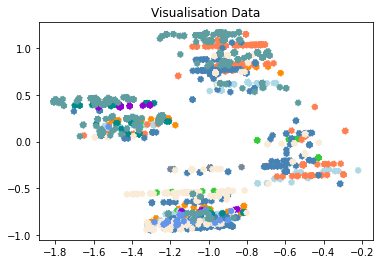

In [220]:
 # Nettoyage des données
data_synthese_bis=dataPreparationbis(data_synthese)[0]
# Extraire Y qui est la colonne sous-groupe
Y = np.array(extraire_col(data_synthese_bis,0))
# renvoie les variables en transformant les categorielles en numeriques grace au dummies 
X = pd.get_dummies(data_synthese_bis.drop(columns=["Groupe d'aliment"]))
X = clust.normalisation(X)
    
X = np.array(X)
    
#Visualiser le jeu de données
print("Visualisation des groupes ")
a,v = np.unique(Y,return_counts=True)
ut.visualiser_Multi(X,encode(Y),"Visualisation Data",len(a))
print("\n")
    

In [9]:
data_synthese_bis = dataPreparationbis(data_synthese)[0]
data_synthese_bis = pd.get_dummies(data_synthese_bis)
data_synthese_bis = clust.normalisation(data_synthese_bis)

In [222]:
print(data_synthese_bis.shape)

(2479, 102)


In [223]:
indexes = [rd.randint(0,2478) for i in range(50)]
data_synthese_bis = data_synthese_bis.iloc[indexes,:]
data_synthese_bis.shape

(50, 102)

#### Centroid Linkage

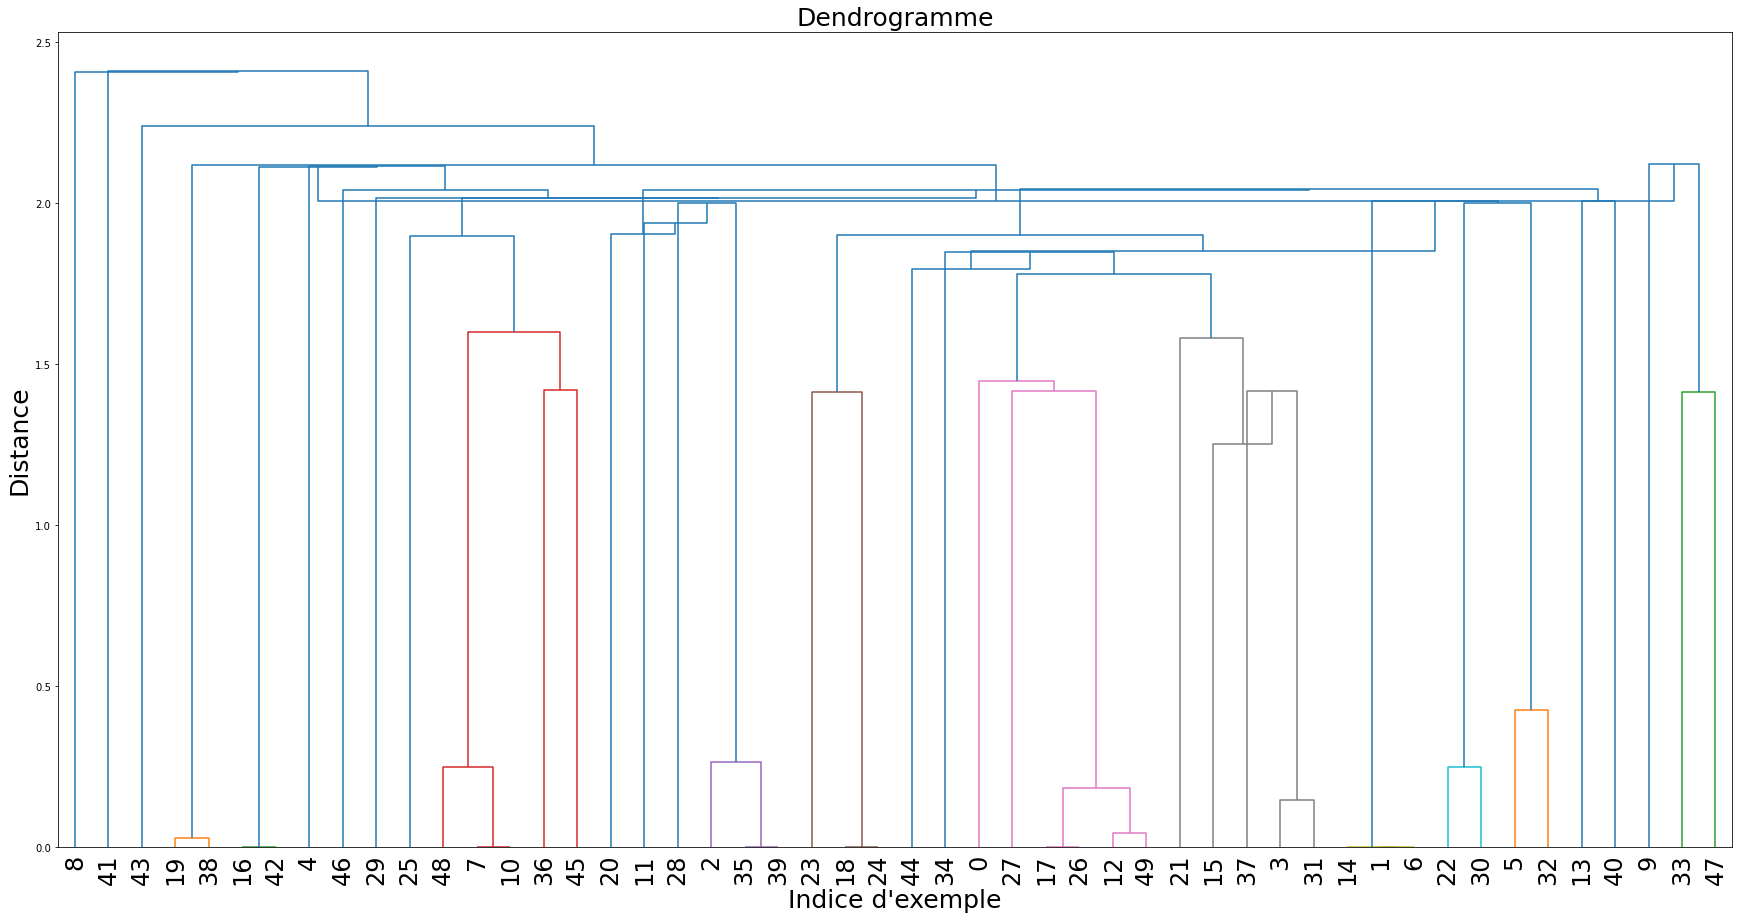

In [226]:
clustering_centroid = clust.clustering_hierarchique(data_synthese_bis,verbose=False,dendrogramme=True)[1]

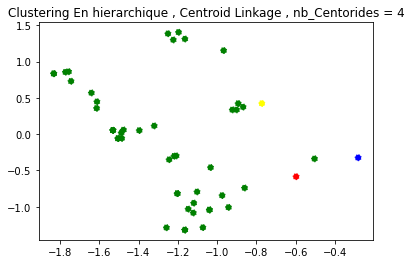

In [227]:
clusters = clust.separer(data_synthese_bis,clustering_centroid,4)
clust.visualiserClusters(np.array(data_synthese_bis),"Clustering En hierarchique , Centroid Linkage , nb_Centorides = 4",clusters)

#### Complete Linkage

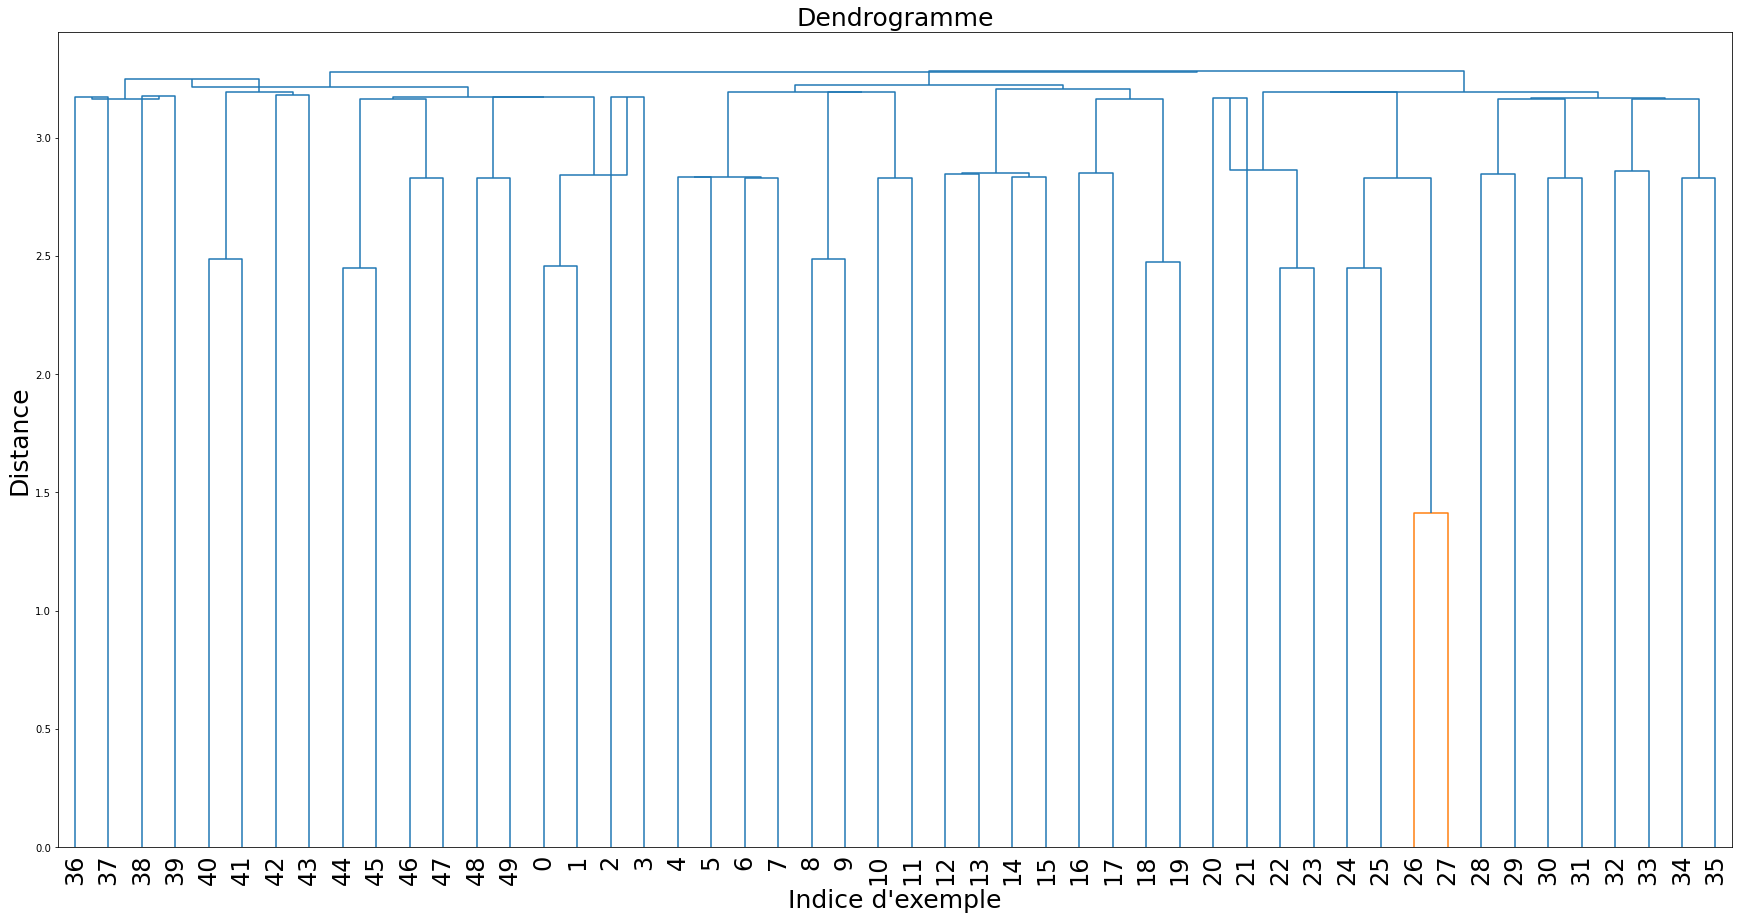

In [228]:
clustering_centroid = clust.clustering_hierarchique_complete(data_synthese_bis,verbose=False,dendrogramme=True)

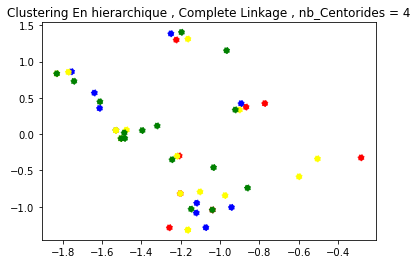

In [229]:
clusters = clust.separer(data_synthese_bis,clustering_centroid,4)
clust.visualiserClusters(np.array(data_synthese_bis),"Clustering En hierarchique , Complete Linkage , nb_Centorides = 4",clusters)

#### Simple Linkage

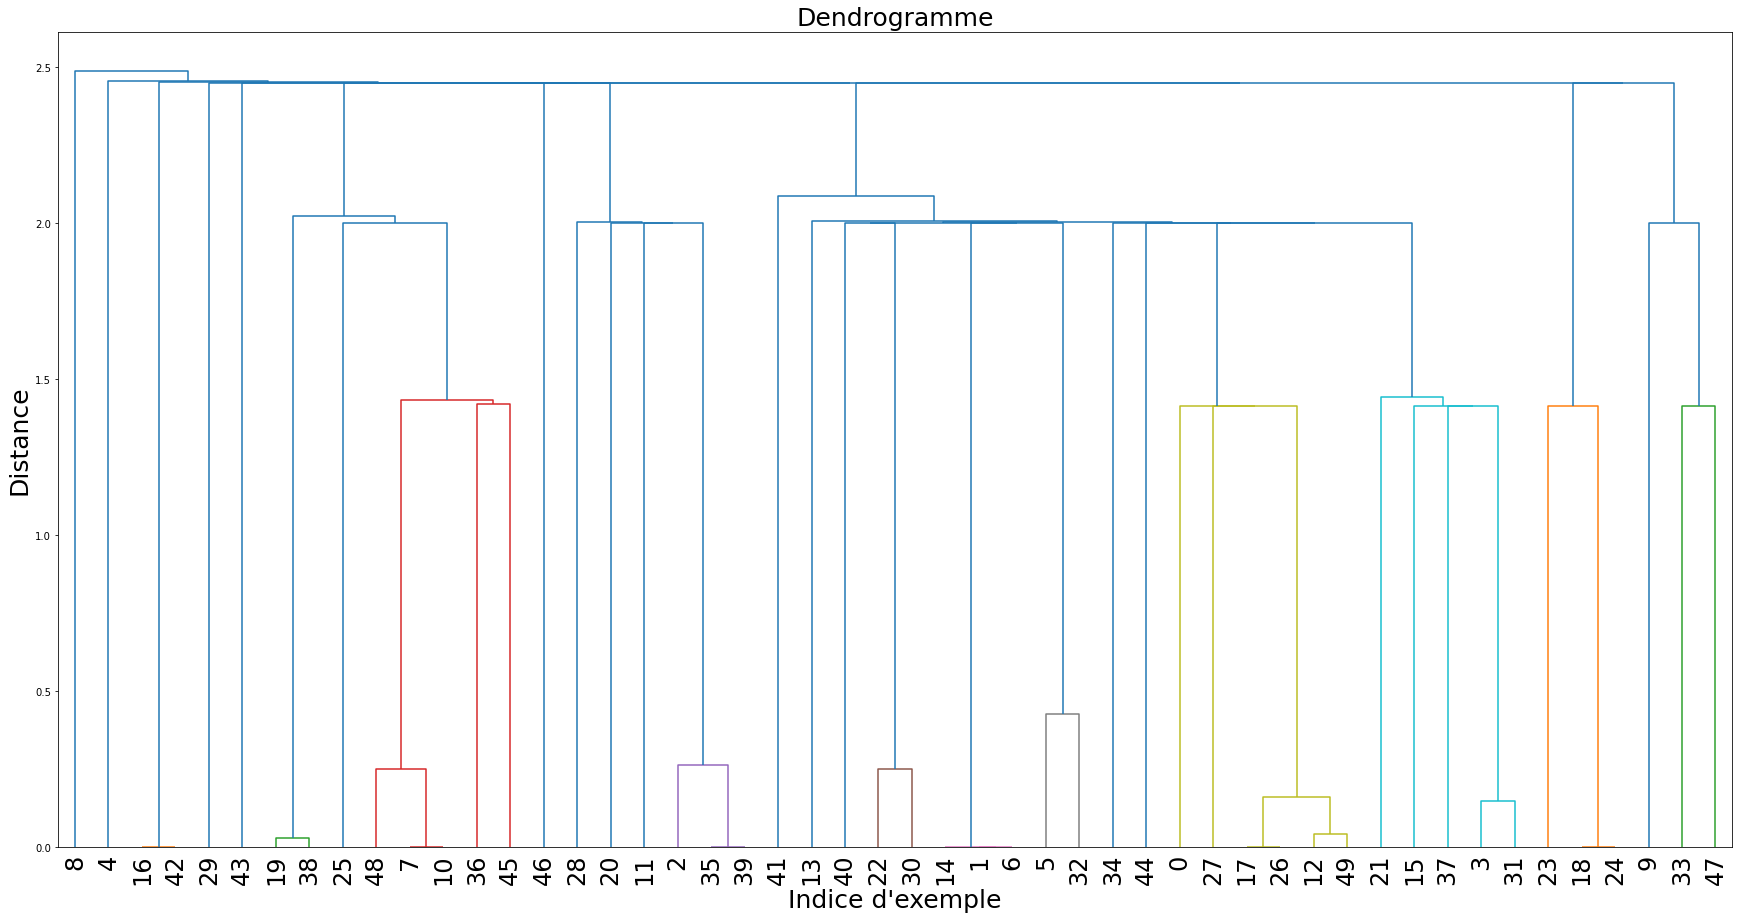

In [232]:
clustering_centroid = clust.clustering_hierarchique_simple(data_synthese_bis,verbose=False,dendrogramme=True)

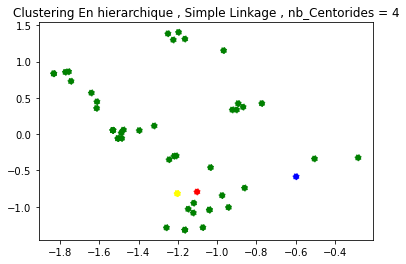

In [233]:
clusters = clust.separer(data_synthese_bis,clustering_centroid,4)
clust.visualiserClusters(np.array(data_synthese_bis),"Clustering En hierarchique , Simple Linkage , nb_Centorides = 4",clusters)

#### Average Linkage

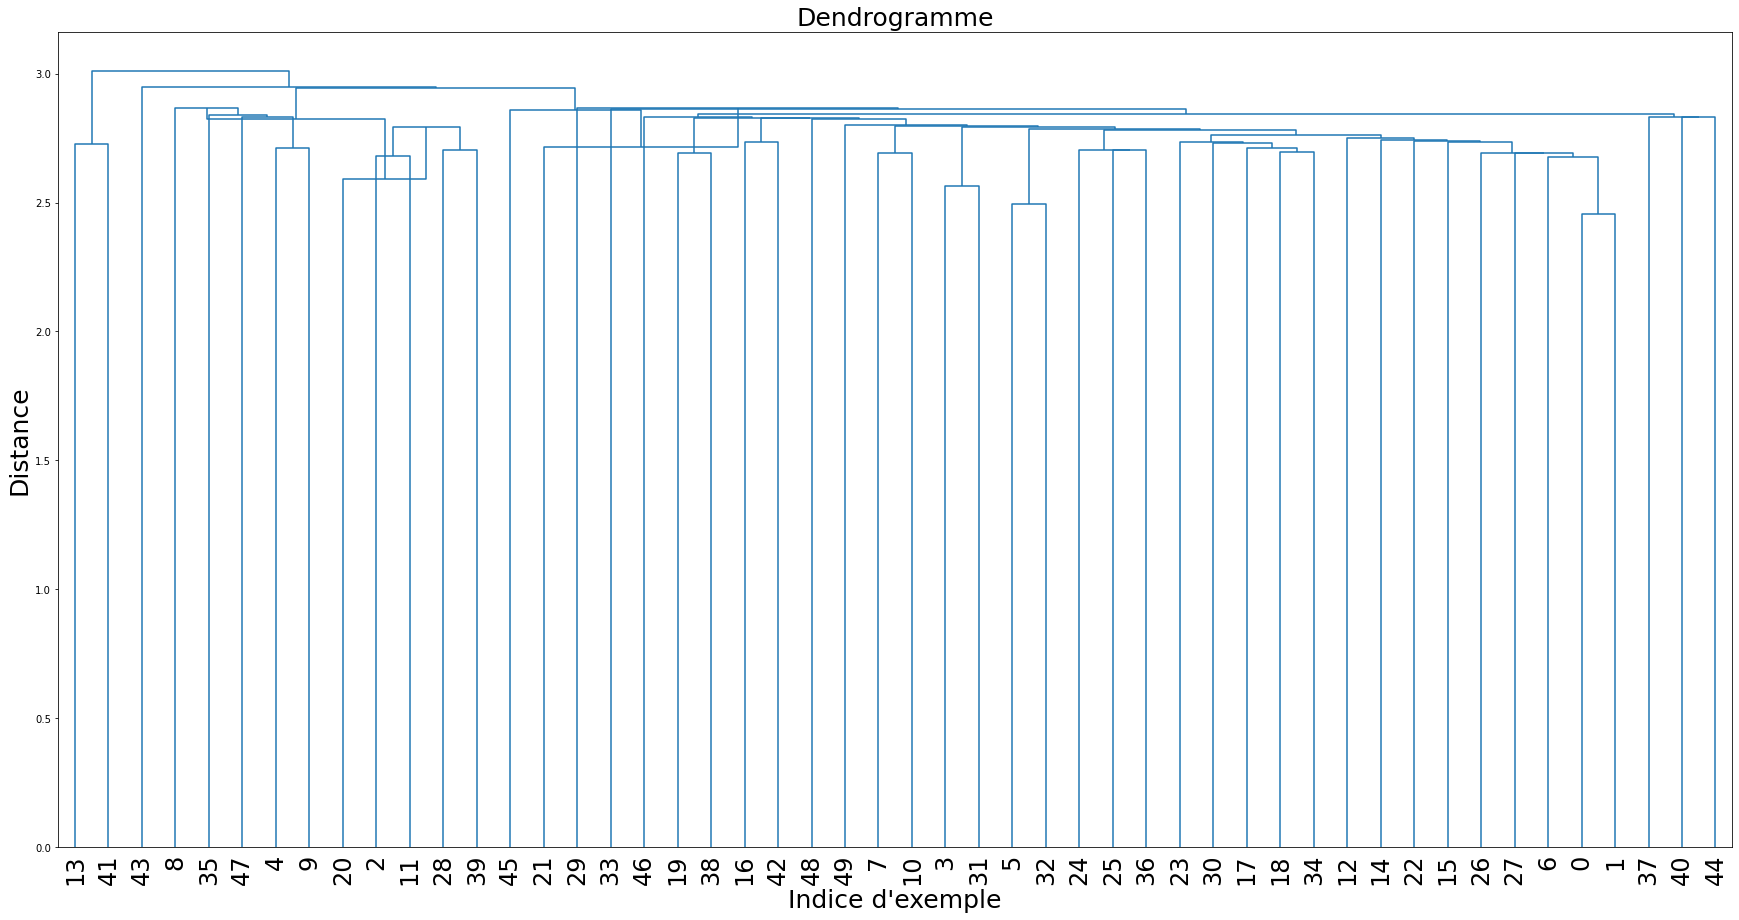

In [234]:
clustering_centroid = clust.clustering_hierarchique_average(data_synthese_bis,verbose=False,dendrogramme=True)

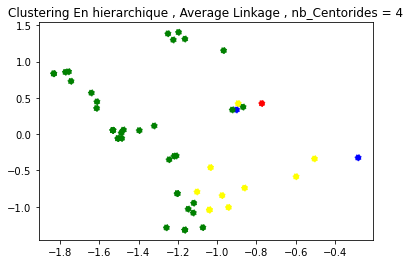

In [235]:
clusters = clust.separer(data_synthese_bis,clustering_centroid,4)
clust.visualiserClusters(np.array(data_synthese_bis),"Clustering En hierarchique , Average Linkage , nb_Centorides = 4",clusters)